# FLIGHT PRICE PREDICTION:
***

Anyone who has booked a flight ticket knows how unexpectedly the prices vary. The cheapest 
available ticket on a given flight gets more and less expensive over time. This usually happens as 
an attempt to maximize revenue based on -

1. Time of purchase patterns (making sure last-minute purchases are expensive).

2. Keeping the flight as full as they want it (raising prices on a flight which is filling up in order to reduce sales and hold back inventory for those expensive last-minute expensive purchases).

So, you have to work on a project where you collect data of flight fares with other features and 
work to make a model to predict fares of flights.

### STEPS:

**1. Data Collection**

You have to scrape at least 1500 rows of data. You can scrape more data as well, it’s up to you, 
More the data better the model
In this section you have to scrape the data of flights from different websites (yatra.com, 
skyscanner.com, official websites of airlines, etc). The number of columns for data doesn’t have 
limit, it’s up to you and your creativity. Generally, these columns areairline name, date of journey, 
source, destination, route, departure time, arrival time, duration, total stops and the target variable 
price. You can make changes to it, you can add or you can remove some columns, it completely
depends on the website from which you are fetching the data.

**2. Data Analysis**

After cleaning the data, you have to do some analysis on the data. 
Do airfares change frequently? Do they move in small increments or in large jumps? Do they tend 
to go up or down over time?
What is the best time to buy so that the consumer can save the most by taking the least risk?
Does price increase as we get near to departure date? Is Indigo cheaper than Jet Airways? Are 
morning flights expensive?

**3. Model Building**

After collecting the data, you need to build a machine learning model. Before model building do 
all data pre-processing steps. Try different models with different hyper parameters and select 
the bestmodel.
Follow the complete life cycle of data science. Include all the steps like
1. Data Cleaning
2. Exploratory Data Analysis
3. Data Pre-processing
4. Model Building
5. Model Evaluation
6. Selecting the best mode
***

### STEP_01: Data Collection:-

In [1]:
# Let's import all required Libraries:
import pandas as pd
import numpy as np
from selenium.webdriver.common.keys import Keys
import selenium # Library that is used to work with selenium.
from selenium import webdriver # Importing webdriver module from selenium to open automated chrome window
import pandas as pd # to create Dataframe
from selenium.webdriver.common.by import By # importing inbuilt class by
import warnings # to ignore any sort of warning
warnings.filterwarnings("ignore")

import requests
import re # regular expression

# importing delays:

import time # used to stop engine for few seconds
from selenium.webdriver.support.ui import WebDriverWait # used to stop engine for few seconds
from selenium.webdriver.support import expected_conditions as EC # EC contains a set of predefined conditions to use with WebDriverWait.

# importing exceptions:
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import StaleElementReferenceException 
from selenium.common.exceptions import ElementNotVisibleException 
from selenium.common.exceptions import ElementNotInteractableException
from selenium.common.exceptions import SessionNotCreatedException
from selenium.common.exceptions import TimeoutException

In [2]:
# Connecting to webdriver
driver=webdriver.Chrome(r"C:\Users\Lenovo\chromedriver.exe")
time.sleep(1)

# Opening ' yatra.com' in chrome browser:
url='https://www.yatra.com/'
driver.get(url)
driver.maximize_window()
time.sleep(2)

In [3]:
Airlines = []
Aeroplane = []
Dept_time = []
Arrival_time = []
Source = []
Destination = []
Duration = []
Stops = []
Date = []
Price = []

## A. Extracting Economy flights from New Dehli to Bombay

- **Opening Economy flights from New Delhi to Bombay on 12 Jan 2023**

In [4]:
url = "https://flight.yatra.com/air-search-ui/dom2/trigger?type=O&viewName=normal&flexi=0&noOfSegments=1&origin=DEL&originCountry=IN&destination=BOM&destinationCountry=IN&flight_depart_date=12%2F01%2F2023&ADT=1&CHD=0&INF=0&class=Economy&source=fresco-home&unqvaldesktop=1478029510214"
driver.get(url)
time.sleep(2)

In [5]:
for i in range(0,50):
    time.sleep(0.1)
    driver.execute_script("window.scrollBy(0,2000)","")
    time.sleep(0.2)
    driver.execute_script("window.scrollBy(0,2500)","")

In [6]:
flights=driver.find_elements(By.XPATH,'//div[@class="flight-det table full-width clearfix"]')
len(flights)

145

In [7]:
# Extracting Airlines Name Via Xpath
airlines = driver.find_elements(By.XPATH,"//div[@class='fs-13 airline-name no-pad col-8']/span")
for i in airlines:
    Airlines.append(i.text.replace("\n"," "))
else :
    pass

# Extracting Aeroplane model  via xpath
aeroplanes = driver.find_elements(By.XPATH,'//p[@class="normal fs-11 font-lightestgrey no-wrap fl-no"]/span')
for i in aeroplanes:
    Aeroplane.append(i.text) 
else:
    pass

# Extracting Departure Time of Filght via Xpath
dept_times = driver.find_elements(By.XPATH,'//div[@class="i-b pr"]')
for i in dept_times:
    Dept_time.append(i.text)
else :
    pass

# Extracting Arrival Time via xpath
arrival = driver.find_elements(By.XPATH,'//p[@class="bold fs-15 mb-2 pr time"]')
for i in arrival:
    Arrival_time.append(i.text)
else :
    pass

# Extracting Source of flight via Xpath
source = driver.find_elements(By.XPATH,"//div[@class='i-b col-4 no-wrap text-right dtime col-3']/p")
for i in source:
    Source.append(i.text)
else :
    pass

# Extracting Destination of Flights via Xpath
destination = driver.find_elements(By.XPATH,'//div[@class="i-b pdd-0 text-left atime col-5"]/p[2]')
for i in destination:
    Destination.append(i.text)
else:
    pass

# Extracting Duration of Flights via Xpath
duration = driver.find_elements(By.XPATH,'//div[@class="stop-cont pl-13"]/p')
for i in duration:
    Duration.append(i.text)
else:
    pass

# Extracting stop details via Xpath
stop = driver.find_elements(By.XPATH,"//div[@class='stop-cont pl-13']/div/span")
for i in stop:
    Stops.append(i.text)
else:
    pass

# Extracting Price of Flights via Xpath
count = 0
price = driver.find_elements(By.XPATH,'//div[@class="i-b tipsy fare-summary-tooltip fs-18"]')
for i in price:
    Price.append(i.text.replace(',',''))
    count = count +1
else:
    count = count +1
    pass

# Clicking on Flights details element
Button = driver.find_elements(By.XPATH,'//div[@class="link-color fs-12 cursor-pointer"]/span')
driver.execute_script("arguments[0].click();", WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.XPATH,'//div[@class="link-color fs-12 cursor-pointer"]/span'))))
time.sleep(1)

# Extracting Date of Flights via Xpath
date = driver.find_element(By.XPATH,'//div[@class="bold fs-12 mb-5"]')
a = date.text
for i in range(count-1):
    Date.append(a)
else:
    pass

In [8]:
len(Aeroplane), len(Airlines), len(Dept_time), len(Arrival_time), len(Source), len(Destination), len(Duration), len(Stops),len(Price), len(Date)

(145, 145, 145, 145, 145, 145, 145, 145, 145, 145)

- **Opening Economy flights from New Dehli to Bombay on 13 Jan 2023**

In [9]:
url = "https://flight.yatra.com/air-search-ui/dom2/trigger?ADT=1&CHD=0&INF=0&class=Economy&destination=BOM&destinationCountry=IN&flexi=0&flight_depart_date=13%2F01%2F2023&hb=&noOfSegments=1&origin=DEL&originCountry=IN&type=O&unique=1673444516413&viewName=normal"
driver.get(url)
time.sleep(2)

In [10]:
for i in range(0,100):
    time.sleep(0.1)
    driver.execute_script("window.scrollBy(0,3000)","")
    time.sleep(0.2)
    driver.execute_script("window.scrollBy(0,3000)","")

In [11]:
flights=driver.find_elements(By.XPATH,'//div[@class="flight-det table full-width clearfix"]')
len(flights)

159

In [12]:
# Extracting Airlines Name Via Xpath
airlines = driver.find_elements(By.XPATH,"//div[@class='fs-13 airline-name no-pad col-8']/span")
for i in airlines:
    Airlines.append(i.text.replace("\n"," "))
else :
    pass

# Extracting Aeroplane model  via xpath
aeroplanes = driver.find_elements(By.XPATH,'//p[@class="normal fs-11 font-lightestgrey no-wrap fl-no"]/span')
for i in aeroplanes:
    Aeroplane.append(i.text) 
else:
    pass

# Extracting Departure Time of Filght via Xpath
dept_times = driver.find_elements(By.XPATH,'//div[@class="i-b pr"]')
for i in dept_times:
    Dept_time.append(i.text)
else :
    pass

# Extracting Arrival Time via xpath
arrival = driver.find_elements(By.XPATH,'//p[@class="bold fs-15 mb-2 pr time"]')
for i in arrival:
    Arrival_time.append(i.text)
else :
    pass

# Extracting Source of flight via Xpath
source = driver.find_elements(By.XPATH,"//div[@class='i-b col-4 no-wrap text-right dtime col-3']/p")
for i in source:
    Source.append(i.text)
else :
    pass

# Extracting Destination of Flights via Xpath
destination = driver.find_elements(By.XPATH,'//div[@class="i-b pdd-0 text-left atime col-5"]/p[2]')
for i in destination:
    Destination.append(i.text)
else:
    pass

# Extracting Duration of Flights via Xpath
duration = driver.find_elements(By.XPATH,'//div[@class="stop-cont pl-13"]/p')
for i in duration:
    Duration.append(i.text)
else:
    pass

# Extracting stop details via Xpath
stop = driver.find_elements(By.XPATH,"//div[@class='stop-cont pl-13']/div/span")
for i in stop:
    Stops.append(i.text)
else:
    pass

# Extracting Price of Flights via Xpath
count = 0
price = driver.find_elements(By.XPATH,'//div[@class="i-b tipsy fare-summary-tooltip fs-18"]')
for i in price:
    Price.append(i.text.replace(',',''))
    count = count +1
else:
    count = count +1
    pass

# Clicking on Flights details element
Button = driver.find_elements(By.XPATH,'//div[@class="link-color fs-12 cursor-pointer"]/span')
driver.execute_script("arguments[0].click();", WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.XPATH,'//div[@class="link-color fs-12 cursor-pointer"]/span'))))
time.sleep(0.25)

# Extracting Date of Flights via Xpath
date = driver.find_element(By.XPATH,'//div[@class="bold fs-12 mb-5"]')
a = date.text
for i in range(count-1):
    Date.append(a)
else:
    pass

In [13]:
len(Aeroplane), len(Airlines), len(Dept_time), len(Arrival_time), len(Source), len(Destination), len(Duration), len(Stops),len(Price), len(Date)

(304, 304, 304, 304, 304, 304, 304, 304, 304, 304)

- **Opening Economy flights from New Dehli to Bombay on 14 Jan 2023**

In [14]:
url = "https://flight.yatra.com/air-search-ui/dom2/trigger?ADT=1&CHD=0&INF=0&class=Economy&destination=BOM&destinationCountry=IN&flexi=0&flight_depart_date=14%2F01%2F2023&hb=&noOfSegments=1&origin=DEL&originCountry=IN&type=O&unique=1673445144356&viewName=normal"
driver.get(url)
time.sleep(2)

In [15]:
for i in range(0,100):
    time.sleep(0.1)
    driver.execute_script("window.scrollBy(0,3000)","")
    time.sleep(0.2)
    driver.execute_script("window.scrollBy(0,3000)","")

In [16]:
flights=driver.find_elements(By.XPATH,'//div[@class="flight-det table full-width clearfix"]')
len(flights)

161

In [17]:
# Extracting Airlines Name Via Xpath
airlines = driver.find_elements(By.XPATH,"//div[@class='fs-13 airline-name no-pad col-8']/span")
for i in airlines:
    Airlines.append(i.text.replace("\n"," "))
else :
    pass

# Extracting Aeroplane model  via xpath
aeroplanes = driver.find_elements(By.XPATH,'//p[@class="normal fs-11 font-lightestgrey no-wrap fl-no"]/span')
for i in aeroplanes:
    Aeroplane.append(i.text) 
else:
    pass

# Extracting Departure Time of Filght via Xpath
dept_times = driver.find_elements(By.XPATH,'//div[@class="i-b pr"]')
for i in dept_times:
    Dept_time.append(i.text)
else :
    pass

# Extracting Arrival Time via xpath
arrival = driver.find_elements(By.XPATH,'//p[@class="bold fs-15 mb-2 pr time"]')
for i in arrival:
    Arrival_time.append(i.text)
else :
    pass

# Extracting Source of flight via Xpath
source = driver.find_elements(By.XPATH,"//div[@class='i-b col-4 no-wrap text-right dtime col-3']/p")
for i in source:
    Source.append(i.text)
else :
    pass

# Extracting Destination of Flights via Xpath
destination = driver.find_elements(By.XPATH,'//div[@class="i-b pdd-0 text-left atime col-5"]/p[2]')
for i in destination:
    Destination.append(i.text)
else:
    pass

# Extracting Duration of Flights via Xpath
duration = driver.find_elements(By.XPATH,'//div[@class="stop-cont pl-13"]/p')
for i in duration:
    Duration.append(i.text)
else:
    pass

# Extracting stop details via Xpath
stop = driver.find_elements(By.XPATH,"//div[@class='stop-cont pl-13']/div/span")
for i in stop:
    Stops.append(i.text)
else:
    pass

# Extracting Price of Flights via Xpath
count = 0
price = driver.find_elements(By.XPATH,'//div[@class="i-b tipsy fare-summary-tooltip fs-18"]')
for i in price:
    Price.append(i.text.replace(',',''))
    count = count +1
else:
    count = count +1
    pass

# Clicking on Flights details element
Button = driver.find_elements(By.XPATH,'//div[@class="link-color fs-12 cursor-pointer"]/span')
driver.execute_script("arguments[0].click();", WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.XPATH,'//div[@class="link-color fs-12 cursor-pointer"]/span'))))
time.sleep(0.25)

# Extracting Date of Flights via Xpath
date = driver.find_element(By.XPATH,'//div[@class="bold fs-12 mb-5"]')
a = date.text
for i in range(count-1):
    Date.append(a)
else:
    pass

In [18]:
len(Aeroplane), len(Airlines), len(Dept_time), len(Arrival_time), len(Source), len(Destination), len(Duration), len(Stops),len(Price), len(Date)

(465, 465, 465, 465, 465, 465, 465, 465, 465, 465)

- **Opening Economy flights from New Dehli to Bombay on 15 Jan 2023**

In [19]:
url = "https://flight.yatra.com/air-search-ui/dom2/trigger?ADT=1&CHD=0&INF=0&class=Economy&destination=BOM&destinationCountry=IN&flexi=0&flight_depart_date=15%2F01%2F2023&hb=&noOfSegments=1&origin=DEL&originCountry=IN&type=O&unique=1673445530922&viewName=normal"
driver.get(url)
time.sleep(2)

In [20]:
for i in range(0,100):
    time.sleep(0.1)
    driver.execute_script("window.scrollBy(0,3000)","")
    time.sleep(0.2)
    driver.execute_script("window.scrollBy(0,3000)","")

In [21]:
flights=driver.find_elements(By.XPATH,'//div[@class="flight-det table full-width clearfix"]')
len(flights)

158

In [22]:
# Extracting Airlines Name Via Xpath
airlines = driver.find_elements(By.XPATH,"//div[@class='fs-13 airline-name no-pad col-8']/span")
for i in airlines:
    Airlines.append(i.text.replace("\n"," "))
else :
    pass

# Extracting Aeroplane model  via xpath
aeroplanes = driver.find_elements(By.XPATH,'//p[@class="normal fs-11 font-lightestgrey no-wrap fl-no"]/span')
for i in aeroplanes:
    Aeroplane.append(i.text) 
else:
    pass

# Extracting Departure Time of Filght via Xpath
dept_times = driver.find_elements(By.XPATH,'//div[@class="i-b pr"]')
for i in dept_times:
    Dept_time.append(i.text)
else :
    pass

# Extracting Arrival Time via xpath
arrival = driver.find_elements(By.XPATH,'//p[@class="bold fs-15 mb-2 pr time"]')
for i in arrival:
    Arrival_time.append(i.text)
else :
    pass

# Extracting Source of flight via Xpath
source = driver.find_elements(By.XPATH,"//div[@class='i-b col-4 no-wrap text-right dtime col-3']/p")
for i in source:
    Source.append(i.text)
else :
    pass

# Extracting Destination of Flights via Xpath
destination = driver.find_elements(By.XPATH,'//div[@class="i-b pdd-0 text-left atime col-5"]/p[2]')
for i in destination:
    Destination.append(i.text)
else:
    pass

# Extracting Duration of Flights via Xpath
duration = driver.find_elements(By.XPATH,'//div[@class="stop-cont pl-13"]/p')
for i in duration:
    Duration.append(i.text)
else:
    pass

# Extracting stop details via Xpath
stop = driver.find_elements(By.XPATH,"//div[@class='stop-cont pl-13']/div/span")
for i in stop:
    Stops.append(i.text)
else:
    pass

# Extracting Price of Flights via Xpath
count = 0
price = driver.find_elements(By.XPATH,'//div[@class="i-b tipsy fare-summary-tooltip fs-18"]')
for i in price:
    Price.append(i.text.replace(',',''))
    count = count +1
else:
    count = count +1
    pass

# Clicking on Flights details element
Button = driver.find_elements(By.XPATH,'//div[@class="link-color fs-12 cursor-pointer"]/span')
driver.execute_script("arguments[0].click();", WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.XPATH,'//div[@class="link-color fs-12 cursor-pointer"]/span'))))
time.sleep(0.25)

# Extracting Date of Flights via Xpath
date = driver.find_element(By.XPATH,'//div[@class="bold fs-12 mb-5"]')
a = date.text
for i in range(count-1):
    Date.append(a)
else:
    pass

In [23]:
len(Aeroplane), len(Airlines), len(Dept_time), len(Arrival_time), len(Source), len(Destination), len(Duration), len(Stops),len(Price), len(Date)

(623, 623, 623, 623, 623, 623, 623, 623, 623, 623)

- **Opening Economy flights from New Dehli to Bombay on 16 Jan 2023**

In [25]:
url = "https://flight.yatra.com/air-search-ui/dom2/trigger?ADT=1&CHD=0&INF=0&class=Economy&destination=BOM&destinationCountry=IN&flexi=0&flight_depart_date=16%2F01%2F2023&hb=&noOfSegments=1&origin=DEL&originCountry=IN&type=O&unique=1673445916134&viewName=normal"
driver.get(url)
time.sleep(2)

In [26]:
for i in range(0,100):
    time.sleep(0.1)
    driver.execute_script("window.scrollBy(0,3000)","")
    time.sleep(0.2)
    driver.execute_script("window.scrollBy(0,3000)","")

In [27]:
flights=driver.find_elements(By.XPATH,'//div[@class="flight-det table full-width clearfix"]')
len(flights)

160

In [28]:
# Extracting Airlines Name Via Xpath
airlines = driver.find_elements(By.XPATH,"//div[@class='fs-13 airline-name no-pad col-8']/span")
for i in airlines:
    Airlines.append(i.text.replace("\n"," "))
else :
    pass

# Extracting Aeroplane model  via xpath
aeroplanes = driver.find_elements(By.XPATH,'//p[@class="normal fs-11 font-lightestgrey no-wrap fl-no"]/span')
for i in aeroplanes:
    Aeroplane.append(i.text) 
else:
    pass

# Extracting Departure Time of Filght via Xpath
dept_times = driver.find_elements(By.XPATH,'//div[@class="i-b pr"]')
for i in dept_times:
    Dept_time.append(i.text)
else :
    pass

# Extracting Arrival Time via xpath
arrival = driver.find_elements(By.XPATH,'//p[@class="bold fs-15 mb-2 pr time"]')
for i in arrival:
    Arrival_time.append(i.text)
else :
    pass

# Extracting Source of flight via Xpath
source = driver.find_elements(By.XPATH,"//div[@class='i-b col-4 no-wrap text-right dtime col-3']/p")
for i in source:
    Source.append(i.text)
else :
    pass

# Extracting Destination of Flights via Xpath
destination = driver.find_elements(By.XPATH,'//div[@class="i-b pdd-0 text-left atime col-5"]/p[2]')
for i in destination:
    Destination.append(i.text)
else:
    pass

# Extracting Duration of Flights via Xpath
duration = driver.find_elements(By.XPATH,'//div[@class="stop-cont pl-13"]/p')
for i in duration:
    Duration.append(i.text)
else:
    pass

# Extracting stop details via Xpath
stop = driver.find_elements(By.XPATH,"//div[@class='stop-cont pl-13']/div/span")
for i in stop:
    Stops.append(i.text)
else:
    pass

# Extracting Price of Flights via Xpath
count = 0
price = driver.find_elements(By.XPATH,'//div[@class="i-b tipsy fare-summary-tooltip fs-18"]')
for i in price:
    Price.append(i.text.replace(',',''))
    count = count +1
else:
    count = count +1
    pass

# Clicking on Flights details element
Button = driver.find_elements(By.XPATH,'//div[@class="link-color fs-12 cursor-pointer"]/span')
driver.execute_script("arguments[0].click();", WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.XPATH,'//div[@class="link-color fs-12 cursor-pointer"]/span'))))
time.sleep(0.25)

# Extracting Date of Flights via Xpath
date = driver.find_element(By.XPATH,'//div[@class="bold fs-12 mb-5"]')
a = date.text
for i in range(count-1):
    Date.append(a)
else:
    pass

In [29]:
len(Aeroplane), len(Airlines), len(Dept_time), len(Arrival_time), len(Source), len(Destination), len(Duration), len(Stops),len(Price), len(Date)

(783, 783, 783, 783, 783, 783, 783, 783, 783, 783)

## B. Extracting Business flights from New Dehli to Bombay

- **Opening Business flights from New Dehli to Bombay on 12 Jan 2023**

In [30]:
url = "https://flight.yatra.com/air-search-ui/dom2/trigger?type=O&viewName=normal&flexi=0&noOfSegments=1&origin=DEL&originCountry=IN&destination=BOM&destinationCountry=IN&flight_depart_date=12%2F01%2F2023&ADT=1&CHD=0&INF=0&class=Business&source=fresco-home&unqvaldesktop=438503140261"
driver.get(url)
time.sleep(2)

In [31]:
for i in range(0,100):
    time.sleep(0.1)
    driver.execute_script("window.scrollBy(0,3000)","")
    time.sleep(0.2)
    driver.execute_script("window.scrollBy(0,3000)","")

In [32]:
flights=driver.find_elements(By.XPATH,'//div[@class="flight-det table full-width clearfix"]')
len(flights)

80

In [33]:
# Extracting Airlines Name Via Xpath
airlines = driver.find_elements(By.XPATH,"//div[@class='fs-13 airline-name no-pad col-8']/span")
for i in airlines:
    Airlines.append(i.text.replace("\n"," "))
else :
    pass

# Extracting Aeroplane model  via xpath
aeroplanes = driver.find_elements(By.XPATH,'//p[@class="normal fs-11 font-lightestgrey no-wrap fl-no"]/span')
for i in aeroplanes:
    Aeroplane.append(i.text) 
else:
    pass

# Extracting Departure Time of Filght via Xpath
dept_times = driver.find_elements(By.XPATH,'//div[@class="i-b pr"]')
for i in dept_times:
    Dept_time.append(i.text)
else :
    pass

# Extracting Arrival Time via xpath
arrival = driver.find_elements(By.XPATH,'//p[@class="bold fs-15 mb-2 pr time"]')
for i in arrival:
    Arrival_time.append(i.text)
else :
    pass

# Extracting Source of flight via Xpath
source = driver.find_elements(By.XPATH,"//div[@class='i-b col-4 no-wrap text-right dtime col-3']/p")
for i in source:
    Source.append(i.text)
else :
    pass

# Extracting Destination of Flights via Xpath
destination = driver.find_elements(By.XPATH,'//div[@class="i-b pdd-0 text-left atime col-5"]/p[2]')
for i in destination:
    Destination.append(i.text)
else:
    pass

# Extracting Duration of Flights via Xpath
duration = driver.find_elements(By.XPATH,'//div[@class="stop-cont pl-13"]/p')
for i in duration:
    Duration.append(i.text)
else:
    pass

# Extracting stop details via Xpath
stop = driver.find_elements(By.XPATH,"//div[@class='stop-cont pl-13']/div/span")
for i in stop:
    Stops.append(i.text)
else:
    pass

# Extracting Price of Flights via Xpath
count = 0
price = driver.find_elements(By.XPATH,'//div[@class="i-b tipsy fare-summary-tooltip fs-18"]')
for i in price:
    Price.append(i.text.replace(',',''))
    count = count +1
else:
    count = count +1
    pass

# Clicking on Flights details element
Button = driver.find_elements(By.XPATH,'//div[@class="link-color fs-12 cursor-pointer"]/span')
driver.execute_script("arguments[0].click();", WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.XPATH,'//div[@class="link-color fs-12 cursor-pointer"]/span'))))
time.sleep(0.25)

# Extracting Date of Flights via Xpath
date = driver.find_element(By.XPATH,'//div[@class="bold fs-12 mb-5"]')
a = date.text
for i in range(count-1):
    Date.append(a)
else:
    pass

In [34]:
len(Aeroplane), len(Airlines), len(Dept_time), len(Arrival_time), len(Source), len(Destination), len(Duration), len(Stops),len(Price), len(Date)

(863, 863, 863, 863, 863, 863, 863, 863, 863, 863)

- **Opening Business flights from New Dehli to Bombay on 13 Jan 2023**

In [35]:
url = "https://flight.yatra.com/air-search-ui/dom2/trigger?ADT=1&CHD=0&INF=0&class=Business&destination=BOM&destinationCountry=IN&flexi=0&flight_depart_date=13%2F01%2F2023&hb=&noOfSegments=1&origin=DEL&originCountry=IN&type=O&unique=1673448278003&viewName=normal"
driver.get(url)
time.sleep(2)

In [36]:
for i in range(0,100):
    time.sleep(0.1)
    driver.execute_script("window.scrollBy(0,3000)","")
    time.sleep(0.2)
    driver.execute_script("window.scrollBy(0,3000)","")

In [37]:
flights=driver.find_elements(By.XPATH,'//div[@class="flight-det table full-width clearfix"]')
len(flights)

69

In [38]:
# Extracting Airlines Name Via Xpath
airlines = driver.find_elements(By.XPATH,"//div[@class='fs-13 airline-name no-pad col-8']/span")
for i in airlines:
    Airlines.append(i.text.replace("\n"," "))
else :
    pass

# Extracting Aeroplane model  via xpath
aeroplanes = driver.find_elements(By.XPATH,'//p[@class="normal fs-11 font-lightestgrey no-wrap fl-no"]/span')
for i in aeroplanes:
    Aeroplane.append(i.text) 
else:
    pass

# Extracting Departure Time of Filght via Xpath
dept_times = driver.find_elements(By.XPATH,'//div[@class="i-b pr"]')
for i in dept_times:
    Dept_time.append(i.text)
else :
    pass

# Extracting Arrival Time via xpath
arrival = driver.find_elements(By.XPATH,'//p[@class="bold fs-15 mb-2 pr time"]')
for i in arrival:
    Arrival_time.append(i.text)
else :
    pass

# Extracting Source of flight via Xpath
source = driver.find_elements(By.XPATH,"//div[@class='i-b col-4 no-wrap text-right dtime col-3']/p")
for i in source:
    Source.append(i.text)
else :
    pass

# Extracting Destination of Flights via Xpath
destination = driver.find_elements(By.XPATH,'//div[@class="i-b pdd-0 text-left atime col-5"]/p[2]')
for i in destination:
    Destination.append(i.text)
else:
    pass

# Extracting Duration of Flights via Xpath
duration = driver.find_elements(By.XPATH,'//div[@class="stop-cont pl-13"]/p')
for i in duration:
    Duration.append(i.text)
else:
    pass

# Extracting stop details via Xpath
stop = driver.find_elements(By.XPATH,"//div[@class='stop-cont pl-13']/div/span")
for i in stop:
    Stops.append(i.text)
else:
    pass

# Extracting Price of Flights via Xpath
count = 0
price = driver.find_elements(By.XPATH,'//div[@class="i-b tipsy fare-summary-tooltip fs-18"]')
for i in price:
    Price.append(i.text.replace(',',''))
    count = count +1
else:
    count = count +1
    pass

# Clicking on Flights details element
Button = driver.find_elements(By.XPATH,'//div[@class="link-color fs-12 cursor-pointer"]/span')
driver.execute_script("arguments[0].click();", WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.XPATH,'//div[@class="link-color fs-12 cursor-pointer"]/span'))))
time.sleep(0.25)

# Extracting Date of Flights via Xpath
date = driver.find_element(By.XPATH,'//div[@class="bold fs-12 mb-5"]')
a = date.text
for i in range(count-1):
    Date.append(a)
else:
    pass

In [39]:
len(Aeroplane), len(Airlines), len(Dept_time), len(Arrival_time), len(Source), len(Destination), len(Duration), len(Stops),len(Price), len(Date)

(932, 932, 932, 932, 932, 932, 932, 932, 932, 932)

- **Opening Business flights from New Dehli to Bombay on 14 Jan 2023**

In [42]:
url = "https://flight.yatra.com/air-search-ui/dom2/trigger?ADT=1&CHD=0&INF=0&class=Business&destination=BOM&destinationCountry=IN&flexi=0&flight_depart_date=14%2F01%2F2023&hb=&noOfSegments=1&origin=DEL&originCountry=IN&type=O&unique=1673448559508&viewName=normal"
driver.get(url)
time.sleep(2)

In [43]:
for i in range(0,100):
    time.sleep(0.1)
    driver.execute_script("window.scrollBy(0,3000)","")
    time.sleep(0.2)
    driver.execute_script("window.scrollBy(0,3000)","")

In [44]:
flights=driver.find_elements(By.XPATH,'//div[@class="flight-det table full-width clearfix"]')
len(flights)

72

In [45]:
# Extracting Airlines Name Via Xpath
airlines = driver.find_elements(By.XPATH,"//div[@class='fs-13 airline-name no-pad col-8']/span")
for i in airlines:
    Airlines.append(i.text.replace("\n"," "))
else :
    pass

# Extracting Aeroplane model  via xpath
aeroplanes = driver.find_elements(By.XPATH,'//p[@class="normal fs-11 font-lightestgrey no-wrap fl-no"]/span')
for i in aeroplanes:
    Aeroplane.append(i.text) 
else:
    pass

# Extracting Departure Time of Filght via Xpath
dept_times = driver.find_elements(By.XPATH,'//div[@class="i-b pr"]')
for i in dept_times:
    Dept_time.append(i.text)
else :
    pass

# Extracting Arrival Time via xpath
arrival = driver.find_elements(By.XPATH,'//p[@class="bold fs-15 mb-2 pr time"]')
for i in arrival:
    Arrival_time.append(i.text)
else :
    pass

# Extracting Source of flight via Xpath
source = driver.find_elements(By.XPATH,"//div[@class='i-b col-4 no-wrap text-right dtime col-3']/p")
for i in source:
    Source.append(i.text)
else :
    pass

# Extracting Destination of Flights via Xpath
destination = driver.find_elements(By.XPATH,'//div[@class="i-b pdd-0 text-left atime col-5"]/p[2]')
for i in destination:
    Destination.append(i.text)
else:
    pass

# Extracting Duration of Flights via Xpath
duration = driver.find_elements(By.XPATH,'//div[@class="stop-cont pl-13"]/p')
for i in duration:
    Duration.append(i.text)
else:
    pass

# Extracting stop details via Xpath
stop = driver.find_elements(By.XPATH,"//div[@class='stop-cont pl-13']/div/span")
for i in stop:
    Stops.append(i.text)
else:
    pass

# Extracting Price of Flights via Xpath
count = 0
price = driver.find_elements(By.XPATH,'//div[@class="i-b tipsy fare-summary-tooltip fs-18"]')
for i in price:
    Price.append(i.text.replace(',',''))
    count = count +1
else:
    count = count +1
    pass

# Clicking on Flights details element
Button = driver.find_elements(By.XPATH,'//div[@class="link-color fs-12 cursor-pointer"]/span')
driver.execute_script("arguments[0].click();", WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.XPATH,'//div[@class="link-color fs-12 cursor-pointer"]/span'))))
time.sleep(0.25)

# Extracting Date of Flights via Xpath
date = driver.find_element(By.XPATH,'//div[@class="bold fs-12 mb-5"]')
a = date.text
for i in range(count-1):
    Date.append(a)
else:
    pass

In [46]:
len(Aeroplane), len(Airlines), len(Dept_time), len(Arrival_time), len(Source), len(Destination), len(Duration), len(Stops),len(Price), len(Date)

(1004, 1004, 1004, 1004, 1004, 1004, 1004, 1004, 1004, 1004)

- **Opening Business flights from New Dehli to Bombay on 15 Jan 2023**

In [47]:
url = "https://flight.yatra.com/air-search-ui/dom2/trigger?ADT=1&CHD=0&INF=0&class=Business&destination=BOM&destinationCountry=IN&flexi=0&flight_depart_date=15%2F01%2F2023&hb=&noOfSegments=1&origin=DEL&originCountry=IN&type=O&unique=1673448802163&viewName=normal"
driver.get(url)
time.sleep(2)

In [48]:
for i in range(0,100):
    time.sleep(0.1)
    driver.execute_script("window.scrollBy(0,3000)","")
    time.sleep(0.2)
    driver.execute_script("window.scrollBy(0,3000)","")

In [49]:
flights=driver.find_elements(By.XPATH,'//div[@class="flight-det table full-width clearfix"]')
len(flights)

80

In [50]:
# Extracting Airlines Name Via Xpath
airlines = driver.find_elements(By.XPATH,"//div[@class='fs-13 airline-name no-pad col-8']/span")
for i in airlines:
    Airlines.append(i.text.replace("\n"," "))
else :
    pass

# Extracting Aeroplane model  via xpath
aeroplanes = driver.find_elements(By.XPATH,'//p[@class="normal fs-11 font-lightestgrey no-wrap fl-no"]/span')
for i in aeroplanes:
    Aeroplane.append(i.text) 
else:
    pass

# Extracting Departure Time of Filght via Xpath
dept_times = driver.find_elements(By.XPATH,'//div[@class="i-b pr"]')
for i in dept_times:
    Dept_time.append(i.text)
else :
    pass

# Extracting Arrival Time via xpath
arrival = driver.find_elements(By.XPATH,'//p[@class="bold fs-15 mb-2 pr time"]')
for i in arrival:
    Arrival_time.append(i.text)
else :
    pass

# Extracting Source of flight via Xpath
source = driver.find_elements(By.XPATH,"//div[@class='i-b col-4 no-wrap text-right dtime col-3']/p")
for i in source:
    Source.append(i.text)
else :
    pass

# Extracting Destination of Flights via Xpath
destination = driver.find_elements(By.XPATH,'//div[@class="i-b pdd-0 text-left atime col-5"]/p[2]')
for i in destination:
    Destination.append(i.text)
else:
    pass

# Extracting Duration of Flights via Xpath
duration = driver.find_elements(By.XPATH,'//div[@class="stop-cont pl-13"]/p')
for i in duration:
    Duration.append(i.text)
else:
    pass

# Extracting stop details via Xpath
stop = driver.find_elements(By.XPATH,"//div[@class='stop-cont pl-13']/div/span")
for i in stop:
    Stops.append(i.text)
else:
    pass

# Extracting Price of Flights via Xpath
count = 0
price = driver.find_elements(By.XPATH,'//div[@class="i-b tipsy fare-summary-tooltip fs-18"]')
for i in price:
    Price.append(i.text.replace(',',''))
    count = count +1
else:
    count = count +1
    pass

# Clicking on Flights details element
Button = driver.find_elements(By.XPATH,'//div[@class="link-color fs-12 cursor-pointer"]/span')
driver.execute_script("arguments[0].click();", WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.XPATH,'//div[@class="link-color fs-12 cursor-pointer"]/span'))))
time.sleep(0.25)

# Extracting Date of Flights via Xpath
date = driver.find_element(By.XPATH,'//div[@class="bold fs-12 mb-5"]')
a = date.text
for i in range(count-1):
    Date.append(a)
else:
    pass

In [51]:
len(Aeroplane), len(Airlines), len(Dept_time), len(Arrival_time), len(Source), len(Destination), len(Duration), len(Stops),len(Price), len(Date)

(1084, 1084, 1084, 1084, 1084, 1084, 1084, 1084, 1084, 1084)

- **Opening Business flights from New Dehli to Bombay on 16 Jan 2023**

In [52]:
url = "https://flight.yatra.com/air-search-ui/dom2/trigger?ADT=1&CHD=0&INF=0&class=Business&destination=BOM&destinationCountry=IN&flexi=0&flight_depart_date=16%2F01%2F2023&hb=&noOfSegments=1&origin=DEL&originCountry=IN&type=O&unique=1673449419129&viewName=normal"
driver.get(url)
time.sleep(2)

In [53]:
for i in range(0,100):
    time.sleep(0.1)
    driver.execute_script("window.scrollBy(0,3000)","")
    time.sleep(0.2)
    driver.execute_script("window.scrollBy(0,3000)","")

In [54]:
flights=driver.find_elements(By.XPATH,'//div[@class="flight-det table full-width clearfix"]')
len(flights)

74

In [55]:
# Extracting Airlines Name Via Xpath
airlines = driver.find_elements(By.XPATH,"//div[@class='fs-13 airline-name no-pad col-8']/span")
for i in airlines:
    Airlines.append(i.text.replace("\n"," "))
else :
    pass

# Extracting Aeroplane model  via xpath
aeroplanes = driver.find_elements(By.XPATH,'//p[@class="normal fs-11 font-lightestgrey no-wrap fl-no"]/span')
for i in aeroplanes:
    Aeroplane.append(i.text) 
else:
    pass

# Extracting Departure Time of Filght via Xpath
dept_times = driver.find_elements(By.XPATH,'//div[@class="i-b pr"]')
for i in dept_times:
    Dept_time.append(i.text)
else :
    pass

# Extracting Arrival Time via xpath
arrival = driver.find_elements(By.XPATH,'//p[@class="bold fs-15 mb-2 pr time"]')
for i in arrival:
    Arrival_time.append(i.text)
else :
    pass

# Extracting Source of flight via Xpath
source = driver.find_elements(By.XPATH,"//div[@class='i-b col-4 no-wrap text-right dtime col-3']/p")
for i in source:
    Source.append(i.text)
else :
    pass

# Extracting Destination of Flights via Xpath
destination = driver.find_elements(By.XPATH,'//div[@class="i-b pdd-0 text-left atime col-5"]/p[2]')
for i in destination:
    Destination.append(i.text)
else:
    pass

# Extracting Duration of Flights via Xpath
duration = driver.find_elements(By.XPATH,'//div[@class="stop-cont pl-13"]/p')
for i in duration:
    Duration.append(i.text)
else:
    pass

# Extracting stop details via Xpath
stop = driver.find_elements(By.XPATH,"//div[@class='stop-cont pl-13']/div/span")
for i in stop:
    Stops.append(i.text)
else:
    pass

# Extracting Price of Flights via Xpath
count = 0
price = driver.find_elements(By.XPATH,'//div[@class="i-b tipsy fare-summary-tooltip fs-18"]')
for i in price:
    Price.append(i.text.replace(',',''))
    count = count +1
else:
    count = count +1
    pass

# Clicking on Flights details element
Button = driver.find_elements(By.XPATH,'//div[@class="link-color fs-12 cursor-pointer"]/span')
driver.execute_script("arguments[0].click();", WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.XPATH,'//div[@class="link-color fs-12 cursor-pointer"]/span'))))
time.sleep(0.25)

# Extracting Date of Flights via Xpath
date = driver.find_element(By.XPATH,'//div[@class="bold fs-12 mb-5"]')
a = date.text
for i in range(count-1):
    Date.append(a)
else:
    pass

In [56]:
len(Aeroplane), len(Airlines), len(Dept_time), len(Arrival_time), len(Source), len(Destination), len(Duration), len(Stops),len(Price), len(Date)

(1158, 1158, 1158, 1158, 1158, 1158, 1158, 1158, 1158, 1158)

- **Opening Business flights from New Dehli to Bombay on 17 Jan 2023**

In [60]:
url = "https://flight.yatra.com/air-search-ui/dom2/trigger?ADT=1&CHD=0&INF=0&class=Business&destination=BOM&destinationCountry=IN&flexi=0&flight_depart_date=17%2F01%2F2023&hb=&noOfSegments=1&origin=DEL&originCountry=IN&type=O&unique=1673450851211&viewName=normal"
driver.get(url)
time.sleep(2)

In [61]:
for i in range(0,100):
    time.sleep(0.1)
    driver.execute_script("window.scrollBy(0,3000)","")
    time.sleep(0.2)
    driver.execute_script("window.scrollBy(0,3000)","")

In [62]:
flights=driver.find_elements(By.XPATH,'//div[@class="flight-det table full-width clearfix"]')
len(flights)

80

In [63]:
# Extracting Airlines Name Via Xpath
airlines = driver.find_elements(By.XPATH,"//div[@class='fs-13 airline-name no-pad col-8']/span")
for i in airlines:
    Airlines.append(i.text.replace("\n"," "))
else :
    pass

# Extracting Aeroplane model  via xpath
aeroplanes = driver.find_elements(By.XPATH,'//p[@class="normal fs-11 font-lightestgrey no-wrap fl-no"]/span')
for i in aeroplanes:
    Aeroplane.append(i.text) 
else:
    pass

# Extracting Departure Time of Filght via Xpath
dept_times = driver.find_elements(By.XPATH,'//div[@class="i-b pr"]')
for i in dept_times:
    Dept_time.append(i.text)
else :
    pass

# Extracting Arrival Time via xpath
arrival = driver.find_elements(By.XPATH,'//p[@class="bold fs-15 mb-2 pr time"]')
for i in arrival:
    Arrival_time.append(i.text)
else :
    pass

# Extracting Source of flight via Xpath
source = driver.find_elements(By.XPATH,"//div[@class='i-b col-4 no-wrap text-right dtime col-3']/p")
for i in source:
    Source.append(i.text)
else :
    pass

# Extracting Destination of Flights via Xpath
destination = driver.find_elements(By.XPATH,'//div[@class="i-b pdd-0 text-left atime col-5"]/p[2]')
for i in destination:
    Destination.append(i.text)
else:
    pass

# Extracting Duration of Flights via Xpath
duration = driver.find_elements(By.XPATH,'//div[@class="stop-cont pl-13"]/p')
for i in duration:
    Duration.append(i.text)
else:
    pass

# Extracting stop details via Xpath
stop = driver.find_elements(By.XPATH,"//div[@class='stop-cont pl-13']/div/span")
for i in stop:
    Stops.append(i.text)
else:
    pass

# Extracting Price of Flights via Xpath
count = 0
price = driver.find_elements(By.XPATH,'//div[@class="i-b tipsy fare-summary-tooltip fs-18"]')
for i in price:
    Price.append(i.text.replace(',',''))
    count = count +1
else:
    count = count +1
    pass

# Clicking on Flights details element
Button = driver.find_elements(By.XPATH,'//div[@class="link-color fs-12 cursor-pointer"]/span')
driver.execute_script("arguments[0].click();", WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.XPATH,'//div[@class="link-color fs-12 cursor-pointer"]/span'))))
time.sleep(0.25)

# Extracting Date of Flights via Xpath
date = driver.find_element(By.XPATH,'//div[@class="bold fs-12 mb-5"]')
a = date.text
for i in range(count-1):
    Date.append(a)
else:
    pass

In [64]:
len(Aeroplane), len(Airlines), len(Dept_time), len(Arrival_time), len(Source), len(Destination), len(Duration), len(Stops),len(Price), len(Date)

(1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238)

- **Opening Business flights from New Dehli to Bombay on 18 Jan 2023**

In [65]:
url = "https://flight.yatra.com/air-search-ui/dom2/trigger?ADT=1&CHD=0&INF=0&class=Business&destination=BOM&destinationCountry=IN&flexi=0&flight_depart_date=18%2F01%2F2023&hb=&noOfSegments=1&origin=DEL&originCountry=IN&type=O&unique=1673451253040&viewName=normal"
driver.get(url)
time.sleep(2)

In [66]:
for i in range(0,100):
    time.sleep(0.1)
    driver.execute_script("window.scrollBy(0,3000)","")
    time.sleep(0.2)
    driver.execute_script("window.scrollBy(0,3000)","")

In [67]:
flights=driver.find_elements(By.XPATH,'//div[@class="flight-det table full-width clearfix"]')
len(flights)

74

In [68]:
# Extracting Airlines Name Via Xpath
airlines = driver.find_elements(By.XPATH,"//div[@class='fs-13 airline-name no-pad col-8']/span")
for i in airlines:
    Airlines.append(i.text.replace("\n"," "))
else :
    pass

# Extracting Aeroplane model  via xpath
aeroplanes = driver.find_elements(By.XPATH,'//p[@class="normal fs-11 font-lightestgrey no-wrap fl-no"]/span')
for i in aeroplanes:
    Aeroplane.append(i.text) 
else:
    pass

# Extracting Departure Time of Filght via Xpath
dept_times = driver.find_elements(By.XPATH,'//div[@class="i-b pr"]')
for i in dept_times:
    Dept_time.append(i.text)
else :
    pass

# Extracting Arrival Time via xpath
arrival = driver.find_elements(By.XPATH,'//p[@class="bold fs-15 mb-2 pr time"]')
for i in arrival:
    Arrival_time.append(i.text)
else :
    pass

# Extracting Source of flight via Xpath
source = driver.find_elements(By.XPATH,"//div[@class='i-b col-4 no-wrap text-right dtime col-3']/p")
for i in source:
    Source.append(i.text)
else :
    pass

# Extracting Destination of Flights via Xpath
destination = driver.find_elements(By.XPATH,'//div[@class="i-b pdd-0 text-left atime col-5"]/p[2]')
for i in destination:
    Destination.append(i.text)
else:
    pass

# Extracting Duration of Flights via Xpath
duration = driver.find_elements(By.XPATH,'//div[@class="stop-cont pl-13"]/p')
for i in duration:
    Duration.append(i.text)
else:
    pass

# Extracting stop details via Xpath
stop = driver.find_elements(By.XPATH,"//div[@class='stop-cont pl-13']/div/span")
for i in stop:
    Stops.append(i.text)
else:
    pass

# Extracting Price of Flights via Xpath
count = 0
price = driver.find_elements(By.XPATH,'//div[@class="i-b tipsy fare-summary-tooltip fs-18"]')
for i in price:
    Price.append(i.text.replace(',',''))
    count = count +1
else:
    count = count +1
    pass

# Clicking on Flights details element
Button = driver.find_elements(By.XPATH,'//div[@class="link-color fs-12 cursor-pointer"]/span')
driver.execute_script("arguments[0].click();", WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.XPATH,'//div[@class="link-color fs-12 cursor-pointer"]/span'))))
time.sleep(0.25)

# Extracting Date of Flights via Xpath
date = driver.find_element(By.XPATH,'//div[@class="bold fs-12 mb-5"]')
a = date.text
for i in range(count-1):
    Date.append(a)
else:
    pass

In [69]:
len(Aeroplane), len(Airlines), len(Dept_time), len(Arrival_time), len(Source), len(Destination), len(Duration), len(Stops),len(Price), len(Date)

(1312, 1312, 1312, 1312, 1312, 1312, 1312, 1312, 1312, 1312)

- **Opening Business flights from New Dehli to Bombay on 19 Jan 2023**

In [70]:
url = "https://flight.yatra.com/air-search-ui/dom2/trigger?ADT=1&CHD=0&INF=0&class=Business&destination=BOM&destinationCountry=IN&flexi=0&flight_depart_date=19%2F01%2F2023&hb=&noOfSegments=1&origin=DEL&originCountry=IN&type=O&unique=1673451886212&viewName=normal"
driver.get(url)
time.sleep(2)

In [71]:
for i in range(0,100):
    time.sleep(0.1)
    driver.execute_script("window.scrollBy(0,3000)","")
    time.sleep(0.2)
    driver.execute_script("window.scrollBy(0,3000)","")

In [72]:
flights=driver.find_elements(By.XPATH,'//div[@class="flight-det table full-width clearfix"]')
len(flights)

80

In [73]:
# Extracting Airlines Name Via Xpath
airlines = driver.find_elements(By.XPATH,"//div[@class='fs-13 airline-name no-pad col-8']/span")
for i in airlines:
    Airlines.append(i.text.replace("\n"," "))
else :
    pass

# Extracting Aeroplane model  via xpath
aeroplanes = driver.find_elements(By.XPATH,'//p[@class="normal fs-11 font-lightestgrey no-wrap fl-no"]/span')
for i in aeroplanes:
    Aeroplane.append(i.text) 
else:
    pass

# Extracting Departure Time of Filght via Xpath
dept_times = driver.find_elements(By.XPATH,'//div[@class="i-b pr"]')
for i in dept_times:
    Dept_time.append(i.text)
else :
    pass

# Extracting Arrival Time via xpath
arrival = driver.find_elements(By.XPATH,'//p[@class="bold fs-15 mb-2 pr time"]')
for i in arrival:
    Arrival_time.append(i.text)
else :
    pass

# Extracting Source of flight via Xpath
source = driver.find_elements(By.XPATH,"//div[@class='i-b col-4 no-wrap text-right dtime col-3']/p")
for i in source:
    Source.append(i.text)
else :
    pass

# Extracting Destination of Flights via Xpath
destination = driver.find_elements(By.XPATH,'//div[@class="i-b pdd-0 text-left atime col-5"]/p[2]')
for i in destination:
    Destination.append(i.text)
else:
    pass

# Extracting Duration of Flights via Xpath
duration = driver.find_elements(By.XPATH,'//div[@class="stop-cont pl-13"]/p')
for i in duration:
    Duration.append(i.text)
else:
    pass

# Extracting stop details via Xpath
stop = driver.find_elements(By.XPATH,"//div[@class='stop-cont pl-13']/div/span")
for i in stop:
    Stops.append(i.text)
else:
    pass

# Extracting Price of Flights via Xpath
count = 0
price = driver.find_elements(By.XPATH,'//div[@class="i-b tipsy fare-summary-tooltip fs-18"]')
for i in price:
    Price.append(i.text.replace(',',''))
    count = count +1
else:
    count = count +1
    pass

# Clicking on Flights details element
Button = driver.find_elements(By.XPATH,'//div[@class="link-color fs-12 cursor-pointer"]/span')
driver.execute_script("arguments[0].click();", WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.XPATH,'//div[@class="link-color fs-12 cursor-pointer"]/span'))))
time.sleep(0.25)

# Extracting Date of Flights via Xpath
date = driver.find_element(By.XPATH,'//div[@class="bold fs-12 mb-5"]')
a = date.text
for i in range(count-1):
    Date.append(a)
else:
    pass

In [74]:
len(Aeroplane), len(Airlines), len(Dept_time), len(Arrival_time), len(Source), len(Destination), len(Duration), len(Stops),len(Price), len(Date)

(1392, 1392, 1392, 1392, 1392, 1392, 1392, 1392, 1392, 1392)

- **Opening Business flights from New Dehli to Bombay on 20 Jan 2023**

In [76]:
url = "https://flight.yatra.com/air-search-ui/dom2/trigger?ADT=1&CHD=0&INF=0&class=Business&destination=BOM&destinationCountry=IN&flexi=0&flight_depart_date=20%2F01%2F2023&hb=&noOfSegments=1&origin=DEL&originCountry=IN&type=O&unique=1673452136592&viewName=normal"
driver.get(url)
time.sleep(2)

In [77]:
for i in range(0,100):
    time.sleep(0.1)
    driver.execute_script("window.scrollBy(0,3000)","")
    time.sleep(0.2)
    driver.execute_script("window.scrollBy(0,3000)","")

In [78]:
flights=driver.find_elements(By.XPATH,'//div[@class="flight-det table full-width clearfix"]')
len(flights)

80

In [79]:
# Extracting Airlines Name Via Xpath
airlines = driver.find_elements(By.XPATH,"//div[@class='fs-13 airline-name no-pad col-8']/span")
for i in airlines:
    Airlines.append(i.text.replace("\n"," "))
else :
    pass

# Extracting Aeroplane model  via xpath
aeroplanes = driver.find_elements(By.XPATH,'//p[@class="normal fs-11 font-lightestgrey no-wrap fl-no"]/span')
for i in aeroplanes:
    Aeroplane.append(i.text) 
else:
    pass

# Extracting Departure Time of Filght via Xpath
dept_times = driver.find_elements(By.XPATH,'//div[@class="i-b pr"]')
for i in dept_times:
    Dept_time.append(i.text)
else :
    pass

# Extracting Arrival Time via xpath
arrival = driver.find_elements(By.XPATH,'//p[@class="bold fs-15 mb-2 pr time"]')
for i in arrival:
    Arrival_time.append(i.text)
else :
    pass

# Extracting Source of flight via Xpath
source = driver.find_elements(By.XPATH,"//div[@class='i-b col-4 no-wrap text-right dtime col-3']/p")
for i in source:
    Source.append(i.text)
else :
    pass

# Extracting Destination of Flights via Xpath
destination = driver.find_elements(By.XPATH,'//div[@class="i-b pdd-0 text-left atime col-5"]/p[2]')
for i in destination:
    Destination.append(i.text)
else:
    pass

# Extracting Duration of Flights via Xpath
duration = driver.find_elements(By.XPATH,'//div[@class="stop-cont pl-13"]/p')
for i in duration:
    Duration.append(i.text)
else:
    pass

# Extracting stop details via Xpath
stop = driver.find_elements(By.XPATH,"//div[@class='stop-cont pl-13']/div/span")
for i in stop:
    Stops.append(i.text)
else:
    pass

# Extracting Price of Flights via Xpath
count = 0
price = driver.find_elements(By.XPATH,'//div[@class="i-b tipsy fare-summary-tooltip fs-18"]')
for i in price:
    Price.append(i.text.replace(',',''))
    count = count +1
else:
    count = count +1
    pass

# Clicking on Flights details element
Button = driver.find_elements(By.XPATH,'//div[@class="link-color fs-12 cursor-pointer"]/span')
driver.execute_script("arguments[0].click();", WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.XPATH,'//div[@class="link-color fs-12 cursor-pointer"]/span'))))
time.sleep(0.25)

# Extracting Date of Flights via Xpath
date = driver.find_element(By.XPATH,'//div[@class="bold fs-12 mb-5"]')
a = date.text
for i in range(count-1):
    Date.append(a)
else:
    pass

In [80]:
len(Aeroplane), len(Airlines), len(Dept_time), len(Arrival_time), len(Source), len(Destination), len(Duration), len(Stops),len(Price), len(Date)

(1472, 1472, 1472, 1472, 1472, 1472, 1472, 1472, 1472, 1472)

- **Opening Business flights from New Dehli to Bombay on 21 Jan 2023**

In [81]:
url = "https://flight.yatra.com/air-search-ui/dom2/trigger?ADT=1&CHD=0&INF=0&class=Business&destination=BOM&destinationCountry=IN&flexi=0&flight_depart_date=21%2F01%2F2023&hb=&noOfSegments=1&origin=DEL&originCountry=IN&type=O&unique=1673452573302&viewName=normal"
driver.get(url)
time.sleep(2)

In [82]:
for i in range(0,100):
    time.sleep(0.1)
    driver.execute_script("window.scrollBy(0,3000)","")
    time.sleep(0.2)
    driver.execute_script("window.scrollBy(0,3000)","")

In [83]:
flights=driver.find_elements(By.XPATH,'//div[@class="flight-det table full-width clearfix"]')
len(flights)

69

In [84]:
# Extracting Airlines Name Via Xpath
airlines = driver.find_elements(By.XPATH,"//div[@class='fs-13 airline-name no-pad col-8']/span")
for i in airlines:
    Airlines.append(i.text.replace("\n"," "))
else :
    pass

# Extracting Aeroplane model  via xpath
aeroplanes = driver.find_elements(By.XPATH,'//p[@class="normal fs-11 font-lightestgrey no-wrap fl-no"]/span')
for i in aeroplanes:
    Aeroplane.append(i.text) 
else:
    pass

# Extracting Departure Time of Filght via Xpath
dept_times = driver.find_elements(By.XPATH,'//div[@class="i-b pr"]')
for i in dept_times:
    Dept_time.append(i.text)
else :
    pass

# Extracting Arrival Time via xpath
arrival = driver.find_elements(By.XPATH,'//p[@class="bold fs-15 mb-2 pr time"]')
for i in arrival:
    Arrival_time.append(i.text)
else :
    pass

# Extracting Source of flight via Xpath
source = driver.find_elements(By.XPATH,"//div[@class='i-b col-4 no-wrap text-right dtime col-3']/p")
for i in source:
    Source.append(i.text)
else :
    pass

# Extracting Destination of Flights via Xpath
destination = driver.find_elements(By.XPATH,'//div[@class="i-b pdd-0 text-left atime col-5"]/p[2]')
for i in destination:
    Destination.append(i.text)
else:
    pass

# Extracting Duration of Flights via Xpath
duration = driver.find_elements(By.XPATH,'//div[@class="stop-cont pl-13"]/p')
for i in duration:
    Duration.append(i.text)
else:
    pass

# Extracting stop details via Xpath
stop = driver.find_elements(By.XPATH,"//div[@class='stop-cont pl-13']/div/span")
for i in stop:
    Stops.append(i.text)
else:
    pass

# Extracting Price of Flights via Xpath
count = 0
price = driver.find_elements(By.XPATH,'//div[@class="i-b tipsy fare-summary-tooltip fs-18"]')
for i in price:
    Price.append(i.text.replace(',',''))
    count = count +1
else:
    count = count +1
    pass

# Clicking on Flights details element
Button = driver.find_elements(By.XPATH,'//div[@class="link-color fs-12 cursor-pointer"]/span')
driver.execute_script("arguments[0].click();", WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.XPATH,'//div[@class="link-color fs-12 cursor-pointer"]/span'))))
time.sleep(0.25)

# Extracting Date of Flights via Xpath
date = driver.find_element(By.XPATH,'//div[@class="bold fs-12 mb-5"]')
a = date.text
for i in range(count-1):
    Date.append(a)
else:
    pass

In [85]:
len(Aeroplane), len(Airlines), len(Dept_time), len(Arrival_time), len(Source), len(Destination), len(Duration), len(Stops),len(Price), len(Date)

(1541, 1541, 1541, 1541, 1541, 1541, 1541, 1541, 1541, 1541)

## C. Extracting Premium Ecomony flights from New Dehli to Bombay

- **Opening Premium Ecomony flights from New Dehli to Bombay on 12 Jan 2023**

In [86]:
url = "https://flight.yatra.com/air-search-ui/dom2/trigger?type=O&viewName=normal&flexi=0&noOfSegments=1&origin=DEL&originCountry=IN&destination=BOM&destinationCountry=IN&flight_depart_date=12%2F01%2F2023&ADT=1&CHD=0&INF=0&class=Special&source=fresco-home&unqvaldesktop=460992646961"
driver.get(url)
time.sleep(2)

In [87]:
for i in range(0,100):
    time.sleep(0.1)
    driver.execute_script("window.scrollBy(0,3000)","")
    time.sleep(0.2)
    driver.execute_script("window.scrollBy(0,3000)","")

In [88]:
flights=driver.find_elements(By.XPATH,'//div[@class="flight-det table full-width clearfix"]')
len(flights)

61

In [89]:
# Extracting Airlines Name Via Xpath
airlines = driver.find_elements(By.XPATH,"//div[@class='fs-13 airline-name no-pad col-8']/span")
for i in airlines:
    Airlines.append(i.text.replace("\n"," "))
else :
    pass

# Extracting Aeroplane model  via xpath
aeroplanes = driver.find_elements(By.XPATH,'//p[@class="normal fs-11 font-lightestgrey no-wrap fl-no"]/span')
for i in aeroplanes:
    Aeroplane.append(i.text) 
else:
    pass

# Extracting Departure Time of Filght via Xpath
dept_times = driver.find_elements(By.XPATH,'//div[@class="i-b pr"]')
for i in dept_times:
    Dept_time.append(i.text)
else :
    pass

# Extracting Arrival Time via xpath
arrival = driver.find_elements(By.XPATH,'//p[@class="bold fs-15 mb-2 pr time"]')
for i in arrival:
    Arrival_time.append(i.text)
else :
    pass

# Extracting Source of flight via Xpath
source = driver.find_elements(By.XPATH,"//div[@class='i-b col-4 no-wrap text-right dtime col-3']/p")
for i in source:
    Source.append(i.text)
else :
    pass

# Extracting Destination of Flights via Xpath
destination = driver.find_elements(By.XPATH,'//div[@class="i-b pdd-0 text-left atime col-5"]/p[2]')
for i in destination:
    Destination.append(i.text)
else:
    pass

# Extracting Duration of Flights via Xpath
duration = driver.find_elements(By.XPATH,'//div[@class="stop-cont pl-13"]/p')
for i in duration:
    Duration.append(i.text)
else:
    pass

# Extracting stop details via Xpath
stop = driver.find_elements(By.XPATH,"//div[@class='stop-cont pl-13']/div/span")
for i in stop:
    Stops.append(i.text)
else:
    pass

# Extracting Price of Flights via Xpath
count = 0
price = driver.find_elements(By.XPATH,'//div[@class="i-b tipsy fare-summary-tooltip fs-18"]')
for i in price:
    Price.append(i.text.replace(',',''))
    count = count +1
else:
    count = count +1
    pass

# Clicking on Flights details element
Button = driver.find_elements(By.XPATH,'//div[@class="link-color fs-12 cursor-pointer"]/span')
driver.execute_script("arguments[0].click();", WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.XPATH,'//div[@class="link-color fs-12 cursor-pointer"]/span'))))
time.sleep(0.25)

# Extracting Date of Flights via Xpath
date = driver.find_element(By.XPATH,'//div[@class="bold fs-12 mb-5"]')
a = date.text
for i in range(count-1):
    Date.append(a)
else:
    pass

In [90]:
len(Aeroplane), len(Airlines), len(Dept_time), len(Arrival_time), len(Source), len(Destination), len(Duration), len(Stops),len(Price), len(Date)

(1602, 1602, 1602, 1602, 1602, 1602, 1602, 1602, 1602, 1602)

- **Opening Premium Ecomony flights from New Dehli to Bombay on 13 Jan 2023**

In [92]:
url = "https://flight.yatra.com/air-search-ui/dom2/trigger?ADT=1&CHD=0&INF=0&class=Special&destination=BOM&destinationCountry=IN&flexi=0&flight_depart_date=13%2F01%2F2023&hb=&noOfSegments=1&origin=DEL&originCountry=IN&type=O&unique=1673458015814&viewName=normal"
driver.get(url)
time.sleep(2)

In [93]:
for i in range(0,100):
    time.sleep(0.1)
    driver.execute_script("window.scrollBy(0,3000)","")
    time.sleep(0.2)
    driver.execute_script("window.scrollBy(0,3000)","")

In [94]:
flights=driver.find_elements(By.XPATH,'//div[@class="flight-det table full-width clearfix"]')
len(flights)

61

In [95]:
# Extracting Airlines Name Via Xpath
airlines = driver.find_elements(By.XPATH,"//div[@class='fs-13 airline-name no-pad col-8']/span")
for i in airlines:
    Airlines.append(i.text.replace("\n"," "))
else :
    pass

# Extracting Aeroplane model  via xpath
aeroplanes = driver.find_elements(By.XPATH,'//p[@class="normal fs-11 font-lightestgrey no-wrap fl-no"]/span')
for i in aeroplanes:
    Aeroplane.append(i.text) 
else:
    pass

# Extracting Departure Time of Filght via Xpath
dept_times = driver.find_elements(By.XPATH,'//div[@class="i-b pr"]')
for i in dept_times:
    Dept_time.append(i.text)
else :
    pass

# Extracting Arrival Time via xpath
arrival = driver.find_elements(By.XPATH,'//p[@class="bold fs-15 mb-2 pr time"]')
for i in arrival:
    Arrival_time.append(i.text)
else :
    pass

# Extracting Source of flight via Xpath
source = driver.find_elements(By.XPATH,"//div[@class='i-b col-4 no-wrap text-right dtime col-3']/p")
for i in source:
    Source.append(i.text)
else :
    pass

# Extracting Destination of Flights via Xpath
destination = driver.find_elements(By.XPATH,'//div[@class="i-b pdd-0 text-left atime col-5"]/p[2]')
for i in destination:
    Destination.append(i.text)
else:
    pass

# Extracting Duration of Flights via Xpath
duration = driver.find_elements(By.XPATH,'//div[@class="stop-cont pl-13"]/p')
for i in duration:
    Duration.append(i.text)
else:
    pass

# Extracting stop details via Xpath
stop = driver.find_elements(By.XPATH,"//div[@class='stop-cont pl-13']/div/span")
for i in stop:
    Stops.append(i.text)
else:
    pass

# Extracting Price of Flights via Xpath
count = 0
price = driver.find_elements(By.XPATH,'//div[@class="i-b tipsy fare-summary-tooltip fs-18"]')
for i in price:
    Price.append(i.text.replace(',',''))
    count = count +1
else:
    count = count +1
    pass

# Clicking on Flights details element
Button = driver.find_elements(By.XPATH,'//div[@class="link-color fs-12 cursor-pointer"]/span')
driver.execute_script("arguments[0].click();", WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.XPATH,'//div[@class="link-color fs-12 cursor-pointer"]/span'))))
time.sleep(0.25)

# Extracting Date of Flights via Xpath
date = driver.find_element(By.XPATH,'//div[@class="bold fs-12 mb-5"]')
a = date.text
for i in range(count-1):
    Date.append(a)
else:
    pass

In [96]:
len(Aeroplane), len(Airlines), len(Dept_time), len(Arrival_time), len(Source), len(Destination), len(Duration), len(Stops),len(Price), len(Date)

(1663, 1663, 1663, 1663, 1663, 1663, 1663, 1663, 1663, 1663)

- **Opening Premium Ecomony flights from New Dehli to Bombay on 14 Jan 2023**

In [97]:
url = "https://flight.yatra.com/air-search-ui/dom2/trigger?ADT=1&CHD=0&INF=0&class=Special&destination=BOM&destinationCountry=IN&flexi=0&flight_depart_date=14%2F01%2F2023&hb=&noOfSegments=1&origin=DEL&originCountry=IN&type=O&unique=1673458390264&viewName=normal"
driver.get(url)
time.sleep(2)

In [98]:
for i in range(0,100):
    time.sleep(0.1)
    driver.execute_script("window.scrollBy(0,3000)","")
    time.sleep(0.2)
    driver.execute_script("window.scrollBy(0,3000)","")

In [99]:
flights=driver.find_elements(By.XPATH,'//div[@class="flight-det table full-width clearfix"]')
len(flights)

60

In [100]:
# Extracting Airlines Name Via Xpath
airlines = driver.find_elements(By.XPATH,"//div[@class='fs-13 airline-name no-pad col-8']/span")
for i in airlines:
    Airlines.append(i.text.replace("\n"," "))
else :
    pass

# Extracting Aeroplane model  via xpath
aeroplanes = driver.find_elements(By.XPATH,'//p[@class="normal fs-11 font-lightestgrey no-wrap fl-no"]/span')
for i in aeroplanes:
    Aeroplane.append(i.text) 
else:
    pass

# Extracting Departure Time of Filght via Xpath
dept_times = driver.find_elements(By.XPATH,'//div[@class="i-b pr"]')
for i in dept_times:
    Dept_time.append(i.text)
else :
    pass

# Extracting Arrival Time via xpath
arrival = driver.find_elements(By.XPATH,'//p[@class="bold fs-15 mb-2 pr time"]')
for i in arrival:
    Arrival_time.append(i.text)
else :
    pass

# Extracting Source of flight via Xpath
source = driver.find_elements(By.XPATH,"//div[@class='i-b col-4 no-wrap text-right dtime col-3']/p")
for i in source:
    Source.append(i.text)
else :
    pass

# Extracting Destination of Flights via Xpath
destination = driver.find_elements(By.XPATH,'//div[@class="i-b pdd-0 text-left atime col-5"]/p[2]')
for i in destination:
    Destination.append(i.text)
else:
    pass

# Extracting Duration of Flights via Xpath
duration = driver.find_elements(By.XPATH,'//div[@class="stop-cont pl-13"]/p')
for i in duration:
    Duration.append(i.text)
else:
    pass

# Extracting stop details via Xpath
stop = driver.find_elements(By.XPATH,"//div[@class='stop-cont pl-13']/div/span")
for i in stop:
    Stops.append(i.text)
else:
    pass

# Extracting Price of Flights via Xpath
count = 0
price = driver.find_elements(By.XPATH,'//div[@class="i-b tipsy fare-summary-tooltip fs-18"]')
for i in price:
    Price.append(i.text.replace(',',''))
    count = count +1
else:
    count = count +1
    pass

# Clicking on Flights details element
Button = driver.find_elements(By.XPATH,'//div[@class="link-color fs-12 cursor-pointer"]/span')
driver.execute_script("arguments[0].click();", WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.XPATH,'//div[@class="link-color fs-12 cursor-pointer"]/span'))))
time.sleep(0.25)

# Extracting Date of Flights via Xpath
date = driver.find_element(By.XPATH,'//div[@class="bold fs-12 mb-5"]')
a = date.text
for i in range(count-1):
    Date.append(a)
else:
    pass

In [101]:
len(Aeroplane), len(Airlines), len(Dept_time), len(Arrival_time), len(Source), len(Destination), len(Duration), len(Stops),len(Price), len(Date)

(1723, 1723, 1723, 1723, 1723, 1723, 1723, 1723, 1723, 1723)

- **Opening Premium Ecomony flights from New Dehli to Bombay on 15 Jan 2023**

In [102]:
url = "https://flight.yatra.com/air-search-ui/dom2/trigger?ADT=1&CHD=0&INF=0&class=Special&destination=BOM&destinationCountry=IN&flexi=0&flight_depart_date=15%2F01%2F2023&hb=&noOfSegments=1&origin=DEL&originCountry=IN&type=O&unique=1673458667359&viewName=normal"
driver.get(url)
time.sleep(2)

In [103]:
for i in range(0,100):
    time.sleep(0.1)
    driver.execute_script("window.scrollBy(0,3000)","")
    time.sleep(0.2)
    driver.execute_script("window.scrollBy(0,3000)","")

In [104]:
flights=driver.find_elements(By.XPATH,'//div[@class="flight-det table full-width clearfix"]')
len(flights)

61

In [105]:
# Extracting Airlines Name Via Xpath
airlines = driver.find_elements(By.XPATH,"//div[@class='fs-13 airline-name no-pad col-8']/span")
for i in airlines:
    Airlines.append(i.text.replace("\n"," "))
else :
    pass

# Extracting Aeroplane model  via xpath
aeroplanes = driver.find_elements(By.XPATH,'//p[@class="normal fs-11 font-lightestgrey no-wrap fl-no"]/span')
for i in aeroplanes:
    Aeroplane.append(i.text) 
else:
    pass

# Extracting Departure Time of Filght via Xpath
dept_times = driver.find_elements(By.XPATH,'//div[@class="i-b pr"]')
for i in dept_times:
    Dept_time.append(i.text)
else :
    pass

# Extracting Arrival Time via xpath
arrival = driver.find_elements(By.XPATH,'//p[@class="bold fs-15 mb-2 pr time"]')
for i in arrival:
    Arrival_time.append(i.text)
else :
    pass

# Extracting Source of flight via Xpath
source = driver.find_elements(By.XPATH,"//div[@class='i-b col-4 no-wrap text-right dtime col-3']/p")
for i in source:
    Source.append(i.text)
else :
    pass

# Extracting Destination of Flights via Xpath
destination = driver.find_elements(By.XPATH,'//div[@class="i-b pdd-0 text-left atime col-5"]/p[2]')
for i in destination:
    Destination.append(i.text)
else:
    pass

# Extracting Duration of Flights via Xpath
duration = driver.find_elements(By.XPATH,'//div[@class="stop-cont pl-13"]/p')
for i in duration:
    Duration.append(i.text)
else:
    pass

# Extracting stop details via Xpath
stop = driver.find_elements(By.XPATH,"//div[@class='stop-cont pl-13']/div/span")
for i in stop:
    Stops.append(i.text)
else:
    pass

# Extracting Price of Flights via Xpath
count = 0
price = driver.find_elements(By.XPATH,'//div[@class="i-b tipsy fare-summary-tooltip fs-18"]')
for i in price:
    Price.append(i.text.replace(',',''))
    count = count +1
else:
    count = count +1
    pass

# Clicking on Flights details element
Button = driver.find_elements(By.XPATH,'//div[@class="link-color fs-12 cursor-pointer"]/span')
driver.execute_script("arguments[0].click();", WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.XPATH,'//div[@class="link-color fs-12 cursor-pointer"]/span'))))
time.sleep(0.25)

# Extracting Date of Flights via Xpath
date = driver.find_element(By.XPATH,'//div[@class="bold fs-12 mb-5"]')
a = date.text
for i in range(count-1):
    Date.append(a)
else:
    pass

In [106]:
len(Aeroplane), len(Airlines), len(Dept_time), len(Arrival_time), len(Source), len(Destination), len(Duration), len(Stops),len(Price), len(Date)

(1784, 1784, 1784, 1784, 1784, 1784, 1784, 1784, 1784, 1784)

- **Opening Premium Ecomony flights from New Dehli to Bombay on 16 Jan 2023**

In [108]:
url = "https://flight.yatra.com/air-search-ui/dom2/trigger?ADT=1&CHD=0&INF=0&class=Special&destination=BOM&destinationCountry=IN&flexi=0&flight_depart_date=16%2F01%2F2023&hb=&noOfSegments=1&origin=DEL&originCountry=IN&type=O&unique=1673459154800&viewName=normal"
driver.get(url)
time.sleep(2)

In [109]:
for i in range(0,100):
    time.sleep(0.1)
    driver.execute_script("window.scrollBy(0,3000)","")
    time.sleep(0.2)
    driver.execute_script("window.scrollBy(0,3000)","")

In [110]:
flights=driver.find_elements(By.XPATH,'//div[@class="flight-det table full-width clearfix"]')
len(flights)

61

In [111]:
# Extracting Airlines Name Via Xpath
airlines = driver.find_elements(By.XPATH,"//div[@class='fs-13 airline-name no-pad col-8']/span")
for i in airlines:
    Airlines.append(i.text.replace("\n"," "))
else :
    pass

# Extracting Aeroplane model  via xpath
aeroplanes = driver.find_elements(By.XPATH,'//p[@class="normal fs-11 font-lightestgrey no-wrap fl-no"]/span')
for i in aeroplanes:
    Aeroplane.append(i.text) 
else:
    pass

# Extracting Departure Time of Filght via Xpath
dept_times = driver.find_elements(By.XPATH,'//div[@class="i-b pr"]')
for i in dept_times:
    Dept_time.append(i.text)
else :
    pass

# Extracting Arrival Time via xpath
arrival = driver.find_elements(By.XPATH,'//p[@class="bold fs-15 mb-2 pr time"]')
for i in arrival:
    Arrival_time.append(i.text)
else :
    pass

# Extracting Source of flight via Xpath
source = driver.find_elements(By.XPATH,"//div[@class='i-b col-4 no-wrap text-right dtime col-3']/p")
for i in source:
    Source.append(i.text)
else :
    pass

# Extracting Destination of Flights via Xpath
destination = driver.find_elements(By.XPATH,'//div[@class="i-b pdd-0 text-left atime col-5"]/p[2]')
for i in destination:
    Destination.append(i.text)
else:
    pass

# Extracting Duration of Flights via Xpath
duration = driver.find_elements(By.XPATH,'//div[@class="stop-cont pl-13"]/p')
for i in duration:
    Duration.append(i.text)
else:
    pass

# Extracting stop details via Xpath
stop = driver.find_elements(By.XPATH,"//div[@class='stop-cont pl-13']/div/span")
for i in stop:
    Stops.append(i.text)
else:
    pass

# Extracting Price of Flights via Xpath
count = 0
price = driver.find_elements(By.XPATH,'//div[@class="i-b tipsy fare-summary-tooltip fs-18"]')
for i in price:
    Price.append(i.text.replace(',',''))
    count = count +1
else:
    count = count +1
    pass

# Clicking on Flights details element
Button = driver.find_elements(By.XPATH,'//div[@class="link-color fs-12 cursor-pointer"]/span')
driver.execute_script("arguments[0].click();", WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.XPATH,'//div[@class="link-color fs-12 cursor-pointer"]/span'))))
time.sleep(0.25)

# Extracting Date of Flights via Xpath
date = driver.find_element(By.XPATH,'//div[@class="bold fs-12 mb-5"]')
a = date.text
for i in range(count-1):
    Date.append(a)
else:
    pass

In [112]:
len(Aeroplane), len(Airlines), len(Dept_time), len(Arrival_time), len(Source), len(Destination), len(Duration), len(Stops),len(Price), len(Date)

(1845, 1845, 1845, 1845, 1845, 1845, 1845, 1845, 1845, 1845)

- **Opening Premium Ecomony flights from New Dehli to Bombay on 17 Jan 2023**

In [113]:
url = "https://flight.yatra.com/air-search-ui/dom2/trigger?ADT=1&CHD=0&INF=0&class=Special&destination=BOM&destinationCountry=IN&flexi=0&flight_depart_date=17%2F01%2F2023&hb=&noOfSegments=1&origin=DEL&originCountry=IN&type=O&unique=1673459267494&viewName=normal"
driver.get(url)
time.sleep(2)

In [114]:
for i in range(0,100):
    time.sleep(0.1)
    driver.execute_script("window.scrollBy(0,3000)","")
    time.sleep(0.2)
    driver.execute_script("window.scrollBy(0,3000)","")

In [115]:
flights=driver.find_elements(By.XPATH,'//div[@class="flight-det table full-width clearfix"]')
len(flights)

61

In [116]:
# Extracting Airlines Name Via Xpath
airlines = driver.find_elements(By.XPATH,"//div[@class='fs-13 airline-name no-pad col-8']/span")
for i in airlines:
    Airlines.append(i.text.replace("\n"," "))
else :
    pass

# Extracting Aeroplane model  via xpath
aeroplanes = driver.find_elements(By.XPATH,'//p[@class="normal fs-11 font-lightestgrey no-wrap fl-no"]/span')
for i in aeroplanes:
    Aeroplane.append(i.text) 
else:
    pass

# Extracting Departure Time of Filght via Xpath
dept_times = driver.find_elements(By.XPATH,'//div[@class="i-b pr"]')
for i in dept_times:
    Dept_time.append(i.text)
else :
    pass

# Extracting Arrival Time via xpath
arrival = driver.find_elements(By.XPATH,'//p[@class="bold fs-15 mb-2 pr time"]')
for i in arrival:
    Arrival_time.append(i.text)
else :
    pass

# Extracting Source of flight via Xpath
source = driver.find_elements(By.XPATH,"//div[@class='i-b col-4 no-wrap text-right dtime col-3']/p")
for i in source:
    Source.append(i.text)
else :
    pass

# Extracting Destination of Flights via Xpath
destination = driver.find_elements(By.XPATH,'//div[@class="i-b pdd-0 text-left atime col-5"]/p[2]')
for i in destination:
    Destination.append(i.text)
else:
    pass

# Extracting Duration of Flights via Xpath
duration = driver.find_elements(By.XPATH,'//div[@class="stop-cont pl-13"]/p')
for i in duration:
    Duration.append(i.text)
else:
    pass

# Extracting stop details via Xpath
stop = driver.find_elements(By.XPATH,"//div[@class='stop-cont pl-13']/div/span")
for i in stop:
    Stops.append(i.text)
else:
    pass

# Extracting Price of Flights via Xpath
count = 0
price = driver.find_elements(By.XPATH,'//div[@class="i-b tipsy fare-summary-tooltip fs-18"]')
for i in price:
    Price.append(i.text.replace(',',''))
    count = count +1
else:
    count = count +1
    pass

# Clicking on Flights details element
Button = driver.find_elements(By.XPATH,'//div[@class="link-color fs-12 cursor-pointer"]/span')
driver.execute_script("arguments[0].click();", WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.XPATH,'//div[@class="link-color fs-12 cursor-pointer"]/span'))))
time.sleep(0.25)

# Extracting Date of Flights via Xpath
date = driver.find_element(By.XPATH,'//div[@class="bold fs-12 mb-5"]')
a = date.text
for i in range(count-1):
    Date.append(a)
else:
    pass

In [117]:
len(Aeroplane), len(Airlines), len(Dept_time), len(Arrival_time), len(Source), len(Destination), len(Duration), len(Stops),len(Price), len(Date)

(1906, 1906, 1906, 1906, 1906, 1906, 1906, 1906, 1906, 1906)

- **Opening Premium Ecomony flights from New Dehli to Bombay on 18 Jan 2023**

In [118]:
url = "https://flight.yatra.com/air-search-ui/dom2/trigger?ADT=1&CHD=0&INF=0&class=Special&destination=BOM&destinationCountry=IN&flexi=0&flight_depart_date=18%2F01%2F2023&hb=&noOfSegments=1&origin=DEL&originCountry=IN&type=O&unique=1673459448944&viewName=normal"
driver.get(url)
time.sleep(2)

In [119]:
for i in range(0,100):
    time.sleep(0.1)
    driver.execute_script("window.scrollBy(0,3000)","")
    time.sleep(0.2)
    driver.execute_script("window.scrollBy(0,3000)","")

In [120]:
flights=driver.find_elements(By.XPATH,'//div[@class="flight-det table full-width clearfix"]')
len(flights)

61

In [121]:
# Extracting Airlines Name Via Xpath
airlines = driver.find_elements(By.XPATH,"//div[@class='fs-13 airline-name no-pad col-8']/span")
for i in airlines:
    Airlines.append(i.text.replace("\n"," "))
else :
    pass

# Extracting Aeroplane model  via xpath
aeroplanes = driver.find_elements(By.XPATH,'//p[@class="normal fs-11 font-lightestgrey no-wrap fl-no"]/span')
for i in aeroplanes:
    Aeroplane.append(i.text) 
else:
    pass

# Extracting Departure Time of Filght via Xpath
dept_times = driver.find_elements(By.XPATH,'//div[@class="i-b pr"]')
for i in dept_times:
    Dept_time.append(i.text)
else :
    pass

# Extracting Arrival Time via xpath
arrival = driver.find_elements(By.XPATH,'//p[@class="bold fs-15 mb-2 pr time"]')
for i in arrival:
    Arrival_time.append(i.text)
else :
    pass

# Extracting Source of flight via Xpath
source = driver.find_elements(By.XPATH,"//div[@class='i-b col-4 no-wrap text-right dtime col-3']/p")
for i in source:
    Source.append(i.text)
else :
    pass

# Extracting Destination of Flights via Xpath
destination = driver.find_elements(By.XPATH,'//div[@class="i-b pdd-0 text-left atime col-5"]/p[2]')
for i in destination:
    Destination.append(i.text)
else:
    pass

# Extracting Duration of Flights via Xpath
duration = driver.find_elements(By.XPATH,'//div[@class="stop-cont pl-13"]/p')
for i in duration:
    Duration.append(i.text)
else:
    pass

# Extracting stop details via Xpath
stop = driver.find_elements(By.XPATH,"//div[@class='stop-cont pl-13']/div/span")
for i in stop:
    Stops.append(i.text)
else:
    pass

# Extracting Price of Flights via Xpath
count = 0
price = driver.find_elements(By.XPATH,'//div[@class="i-b tipsy fare-summary-tooltip fs-18"]')
for i in price:
    Price.append(i.text.replace(',',''))
    count = count +1
else:
    count = count +1
    pass

# Clicking on Flights details element
Button = driver.find_elements(By.XPATH,'//div[@class="link-color fs-12 cursor-pointer"]/span')
driver.execute_script("arguments[0].click();", WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.XPATH,'//div[@class="link-color fs-12 cursor-pointer"]/span'))))
time.sleep(0.25)

# Extracting Date of Flights via Xpath
date = driver.find_element(By.XPATH,'//div[@class="bold fs-12 mb-5"]')
a = date.text
for i in range(count-1):
    Date.append(a)
else:
    pass

In [122]:
len(Aeroplane), len(Airlines), len(Dept_time), len(Arrival_time), len(Source), len(Destination), len(Duration), len(Stops),len(Price), len(Date)

(1967, 1967, 1967, 1967, 1967, 1967, 1967, 1967, 1967, 1967)

- **Opening Premium Ecomony flights from New Dehli to Bombay on 19 Jan 2023**

In [124]:
url = "https://flight.yatra.com/air-search-ui/dom2/trigger?ADT=1&CHD=0&INF=0&class=Special&destination=BOM&destinationCountry=IN&flexi=0&flight_depart_date=19%2F01%2F2023&hb=&noOfSegments=1&origin=DEL&originCountry=IN&type=O&unique=1673460538791&viewName=normal"
driver.get(url)
time.sleep(2)

In [125]:
for i in range(0,100):
    time.sleep(0.1)
    driver.execute_script("window.scrollBy(0,3000)","")
    time.sleep(0.2)
    driver.execute_script("window.scrollBy(0,3000)","")

In [126]:
flights=driver.find_elements(By.XPATH,'//div[@class="flight-det table full-width clearfix"]')
len(flights)

61

In [127]:
# Extracting Airlines Name Via Xpath
airlines = driver.find_elements(By.XPATH,"//div[@class='fs-13 airline-name no-pad col-8']/span")
for i in airlines:
    Airlines.append(i.text.replace("\n"," "))
else :
    pass

# Extracting Aeroplane model  via xpath
aeroplanes = driver.find_elements(By.XPATH,'//p[@class="normal fs-11 font-lightestgrey no-wrap fl-no"]/span')
for i in aeroplanes:
    Aeroplane.append(i.text) 
else:
    pass

# Extracting Departure Time of Filght via Xpath
dept_times = driver.find_elements(By.XPATH,'//div[@class="i-b pr"]')
for i in dept_times:
    Dept_time.append(i.text)
else :
    pass

# Extracting Arrival Time via xpath
arrival = driver.find_elements(By.XPATH,'//p[@class="bold fs-15 mb-2 pr time"]')
for i in arrival:
    Arrival_time.append(i.text)
else :
    pass

# Extracting Source of flight via Xpath
source = driver.find_elements(By.XPATH,"//div[@class='i-b col-4 no-wrap text-right dtime col-3']/p")
for i in source:
    Source.append(i.text)
else :
    pass

# Extracting Destination of Flights via Xpath
destination = driver.find_elements(By.XPATH,'//div[@class="i-b pdd-0 text-left atime col-5"]/p[2]')
for i in destination:
    Destination.append(i.text)
else:
    pass

# Extracting Duration of Flights via Xpath
duration = driver.find_elements(By.XPATH,'//div[@class="stop-cont pl-13"]/p')
for i in duration:
    Duration.append(i.text)
else:
    pass

# Extracting stop details via Xpath
stop = driver.find_elements(By.XPATH,"//div[@class='stop-cont pl-13']/div/span")
for i in stop:
    Stops.append(i.text)
else:
    pass

# Extracting Price of Flights via Xpath
count = 0
price = driver.find_elements(By.XPATH,'//div[@class="i-b tipsy fare-summary-tooltip fs-18"]')
for i in price:
    Price.append(i.text.replace(',',''))
    count = count +1
else:
    count = count +1
    pass

# Clicking on Flights details element
Button = driver.find_elements(By.XPATH,'//div[@class="link-color fs-12 cursor-pointer"]/span')
driver.execute_script("arguments[0].click();", WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.XPATH,'//div[@class="link-color fs-12 cursor-pointer"]/span'))))
time.sleep(0.25)

# Extracting Date of Flights via Xpath
date = driver.find_element(By.XPATH,'//div[@class="bold fs-12 mb-5"]')
a = date.text
for i in range(count-1):
    Date.append(a)
else:
    pass

In [128]:
len(Aeroplane), len(Airlines), len(Dept_time), len(Arrival_time), len(Source), len(Destination), len(Duration), len(Stops),len(Price), len(Date)

(2028, 2028, 2028, 2028, 2028, 2028, 2028, 2028, 2028, 2028)

- **Opening Premium Ecomony flights from New Dehli to Bombay on 20 Jan 2023**

In [129]:
url = "https://flight.yatra.com/air-search-ui/dom2/trigger?ADT=1&CHD=0&INF=0&class=Special&destination=BOM&destinationCountry=IN&flexi=0&flight_depart_date=20%2F01%2F2023&hb=&noOfSegments=1&origin=DEL&originCountry=IN&type=O&unique=1673460689886&viewName=normal"
driver.get(url)
time.sleep(2)

In [130]:
for i in range(0,100):
    time.sleep(0.1)
    driver.execute_script("window.scrollBy(0,3000)","")
    time.sleep(0.2)
    driver.execute_script("window.scrollBy(0,3000)","")

In [131]:
flights=driver.find_elements(By.XPATH,'//div[@class="flight-det table full-width clearfix"]')
len(flights)

61

In [132]:
# Extracting Airlines Name Via Xpath
airlines = driver.find_elements(By.XPATH,"//div[@class='fs-13 airline-name no-pad col-8']/span")
for i in airlines:
    Airlines.append(i.text.replace("\n"," "))
else :
    pass

# Extracting Aeroplane model  via xpath
aeroplanes = driver.find_elements(By.XPATH,'//p[@class="normal fs-11 font-lightestgrey no-wrap fl-no"]/span')
for i in aeroplanes:
    Aeroplane.append(i.text) 
else:
    pass

# Extracting Departure Time of Filght via Xpath
dept_times = driver.find_elements(By.XPATH,'//div[@class="i-b pr"]')
for i in dept_times:
    Dept_time.append(i.text)
else :
    pass

# Extracting Arrival Time via xpath
arrival = driver.find_elements(By.XPATH,'//p[@class="bold fs-15 mb-2 pr time"]')
for i in arrival:
    Arrival_time.append(i.text)
else :
    pass

# Extracting Source of flight via Xpath
source = driver.find_elements(By.XPATH,"//div[@class='i-b col-4 no-wrap text-right dtime col-3']/p")
for i in source:
    Source.append(i.text)
else :
    pass

# Extracting Destination of Flights via Xpath
destination = driver.find_elements(By.XPATH,'//div[@class="i-b pdd-0 text-left atime col-5"]/p[2]')
for i in destination:
    Destination.append(i.text)
else:
    pass

# Extracting Duration of Flights via Xpath
duration = driver.find_elements(By.XPATH,'//div[@class="stop-cont pl-13"]/p')
for i in duration:
    Duration.append(i.text)
else:
    pass

# Extracting stop details via Xpath
stop = driver.find_elements(By.XPATH,"//div[@class='stop-cont pl-13']/div/span")
for i in stop:
    Stops.append(i.text)
else:
    pass

# Extracting Price of Flights via Xpath
count = 0
price = driver.find_elements(By.XPATH,'//div[@class="i-b tipsy fare-summary-tooltip fs-18"]')
for i in price:
    Price.append(i.text.replace(',',''))
    count = count +1
else:
    count = count +1
    pass

# Clicking on Flights details element
Button = driver.find_elements(By.XPATH,'//div[@class="link-color fs-12 cursor-pointer"]/span')
driver.execute_script("arguments[0].click();", WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.XPATH,'//div[@class="link-color fs-12 cursor-pointer"]/span'))))
time.sleep(0.25)

# Extracting Date of Flights via Xpath
date = driver.find_element(By.XPATH,'//div[@class="bold fs-12 mb-5"]')
a = date.text
for i in range(count-1):
    Date.append(a)
else:
    pass

In [133]:
len(Aeroplane), len(Airlines), len(Dept_time), len(Arrival_time), len(Source), len(Destination), len(Duration), len(Stops),len(Price), len(Date)

(2089, 2089, 2089, 2089, 2089, 2089, 2089, 2089, 2089, 2089)

- **Opening Premium Ecomony flights from New Dehli to Bombay on 21 Jan 2023**

In [134]:
url = "https://flight.yatra.com/air-search-ui/dom2/trigger?ADT=1&CHD=0&INF=0&class=Special&destination=BOM&destinationCountry=IN&flexi=0&flight_depart_date=21%2F01%2F2023&hb=&noOfSegments=1&origin=DEL&originCountry=IN&type=O&unique=1673460925009&viewName=normal"
driver.get(url)
time.sleep(2)

In [135]:
for i in range(0,100):
    time.sleep(0.1)
    driver.execute_script("window.scrollBy(0,3000)","")
    time.sleep(0.2)
    driver.execute_script("window.scrollBy(0,3000)","")

In [136]:
flights=driver.find_elements(By.XPATH,'//div[@class="flight-det table full-width clearfix"]')
len(flights)

61

In [137]:
# Extracting Airlines Name Via Xpath
airlines = driver.find_elements(By.XPATH,"//div[@class='fs-13 airline-name no-pad col-8']/span")
for i in airlines:
    Airlines.append(i.text.replace("\n"," "))
else :
    pass

# Extracting Aeroplane model  via xpath
aeroplanes = driver.find_elements(By.XPATH,'//p[@class="normal fs-11 font-lightestgrey no-wrap fl-no"]/span')
for i in aeroplanes:
    Aeroplane.append(i.text) 
else:
    pass

# Extracting Departure Time of Filght via Xpath
dept_times = driver.find_elements(By.XPATH,'//div[@class="i-b pr"]')
for i in dept_times:
    Dept_time.append(i.text)
else :
    pass

# Extracting Arrival Time via xpath
arrival = driver.find_elements(By.XPATH,'//p[@class="bold fs-15 mb-2 pr time"]')
for i in arrival:
    Arrival_time.append(i.text)
else :
    pass

# Extracting Source of flight via Xpath
source = driver.find_elements(By.XPATH,"//div[@class='i-b col-4 no-wrap text-right dtime col-3']/p")
for i in source:
    Source.append(i.text)
else :
    pass

# Extracting Destination of Flights via Xpath
destination = driver.find_elements(By.XPATH,'//div[@class="i-b pdd-0 text-left atime col-5"]/p[2]')
for i in destination:
    Destination.append(i.text)
else:
    pass

# Extracting Duration of Flights via Xpath
duration = driver.find_elements(By.XPATH,'//div[@class="stop-cont pl-13"]/p')
for i in duration:
    Duration.append(i.text)
else:
    pass

# Extracting stop details via Xpath
stop = driver.find_elements(By.XPATH,"//div[@class='stop-cont pl-13']/div/span")
for i in stop:
    Stops.append(i.text)
else:
    pass

# Extracting Price of Flights via Xpath
count = 0
price = driver.find_elements(By.XPATH,'//div[@class="i-b tipsy fare-summary-tooltip fs-18"]')
for i in price:
    Price.append(i.text.replace(',',''))
    count = count +1
else:
    count = count +1
    pass

# Clicking on Flights details element
Button = driver.find_elements(By.XPATH,'//div[@class="link-color fs-12 cursor-pointer"]/span')
driver.execute_script("arguments[0].click();", WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.XPATH,'//div[@class="link-color fs-12 cursor-pointer"]/span'))))
time.sleep(0.25)

# Extracting Date of Flights via Xpath
date = driver.find_element(By.XPATH,'//div[@class="bold fs-12 mb-5"]')
a = date.text
for i in range(count-1):
    Date.append(a)
else:
    pass

In [138]:
len(Aeroplane), len(Airlines), len(Dept_time), len(Arrival_time), len(Source), len(Destination), len(Duration), len(Stops),len(Price), len(Date)

(2150, 2150, 2150, 2150, 2150, 2150, 2150, 2150, 2150, 2150)

- **Opening Premium Ecomony flights from New Dehli to Bombay on 22 Jan 2023**

In [140]:
url = "https://flight.yatra.com/air-search-ui/dom2/trigger?ADT=1&CHD=0&INF=0&class=Special&destination=BOM&destinationCountry=IN&flexi=0&flight_depart_date=22%2F01%2F2023&hb=&noOfSegments=1&origin=DEL&originCountry=IN&type=O&unique=1673461211029&viewName=normal"
driver.get(url)
time.sleep(2)

In [141]:
for i in range(0,100):
    time.sleep(0.1)
    driver.execute_script("window.scrollBy(0,3000)","")
    time.sleep(0.2)
    driver.execute_script("window.scrollBy(0,3000)","")

In [142]:
flights=driver.find_elements(By.XPATH,'//div[@class="flight-det table full-width clearfix"]')
len(flights)

60

In [143]:
# Extracting Airlines Name Via Xpath
airlines = driver.find_elements(By.XPATH,"//div[@class='fs-13 airline-name no-pad col-8']/span")
for i in airlines:
    Airlines.append(i.text.replace("\n"," "))
else :
    pass

# Extracting Aeroplane model  via xpath
aeroplanes = driver.find_elements(By.XPATH,'//p[@class="normal fs-11 font-lightestgrey no-wrap fl-no"]/span')
for i in aeroplanes:
    Aeroplane.append(i.text) 
else:
    pass

# Extracting Departure Time of Filght via Xpath
dept_times = driver.find_elements(By.XPATH,'//div[@class="i-b pr"]')
for i in dept_times:
    Dept_time.append(i.text)
else :
    pass

# Extracting Arrival Time via xpath
arrival = driver.find_elements(By.XPATH,'//p[@class="bold fs-15 mb-2 pr time"]')
for i in arrival:
    Arrival_time.append(i.text)
else :
    pass

# Extracting Source of flight via Xpath
source = driver.find_elements(By.XPATH,"//div[@class='i-b col-4 no-wrap text-right dtime col-3']/p")
for i in source:
    Source.append(i.text)
else :
    pass

# Extracting Destination of Flights via Xpath
destination = driver.find_elements(By.XPATH,'//div[@class="i-b pdd-0 text-left atime col-5"]/p[2]')
for i in destination:
    Destination.append(i.text)
else:
    pass

# Extracting Duration of Flights via Xpath
duration = driver.find_elements(By.XPATH,'//div[@class="stop-cont pl-13"]/p')
for i in duration:
    Duration.append(i.text)
else:
    pass

# Extracting stop details via Xpath
stop = driver.find_elements(By.XPATH,"//div[@class='stop-cont pl-13']/div/span")
for i in stop:
    Stops.append(i.text)
else:
    pass

# Extracting Price of Flights via Xpath
count = 0
price = driver.find_elements(By.XPATH,'//div[@class="i-b tipsy fare-summary-tooltip fs-18"]')
for i in price:
    Price.append(i.text.replace(',',''))
    count = count +1
else:
    count = count +1
    pass

# Clicking on Flights details element
Button = driver.find_elements(By.XPATH,'//div[@class="link-color fs-12 cursor-pointer"]/span')
driver.execute_script("arguments[0].click();", WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.XPATH,'//div[@class="link-color fs-12 cursor-pointer"]/span'))))
time.sleep(0.25)

# Extracting Date of Flights via Xpath
date = driver.find_element(By.XPATH,'//div[@class="bold fs-12 mb-5"]')
a = date.text
for i in range(count-1):
    Date.append(a)
else:
    pass

In [144]:
len(Aeroplane), len(Airlines), len(Dept_time), len(Arrival_time), len(Source), len(Destination), len(Duration), len(Stops),len(Price), len(Date)

(2210, 2210, 2210, 2210, 2210, 2210, 2210, 2210, 2210, 2210)

- **Opening Premium Ecomony flights from New Dehli to Bombay on 23 Jan 2023**

In [145]:
url = "https://flight.yatra.com/air-search-ui/dom2/trigger?ADT=1&CHD=0&INF=0&class=Special&destination=BOM&destinationCountry=IN&flexi=0&flight_depart_date=23%2F01%2F2023&hb=&noOfSegments=1&origin=DEL&originCountry=IN&type=O&unique=1673462065937&viewName=normal"
driver.get(url)
time.sleep(2)

In [146]:
for i in range(0,100):
    time.sleep(0.1)
    driver.execute_script("window.scrollBy(0,3000)","")
    time.sleep(0.2)
    driver.execute_script("window.scrollBy(0,3000)","")

In [147]:
flights=driver.find_elements(By.XPATH,'//div[@class="flight-det table full-width clearfix"]')
len(flights)

61

In [148]:
# Extracting Airlines Name Via Xpath
airlines = driver.find_elements(By.XPATH,"//div[@class='fs-13 airline-name no-pad col-8']/span")
for i in airlines:
    Airlines.append(i.text.replace("\n"," "))
else :
    pass

# Extracting Aeroplane model  via xpath
aeroplanes = driver.find_elements(By.XPATH,'//p[@class="normal fs-11 font-lightestgrey no-wrap fl-no"]/span')
for i in aeroplanes:
    Aeroplane.append(i.text) 
else:
    pass

# Extracting Departure Time of Filght via Xpath
dept_times = driver.find_elements(By.XPATH,'//div[@class="i-b pr"]')
for i in dept_times:
    Dept_time.append(i.text)
else :
    pass

# Extracting Arrival Time via xpath
arrival = driver.find_elements(By.XPATH,'//p[@class="bold fs-15 mb-2 pr time"]')
for i in arrival:
    Arrival_time.append(i.text)
else :
    pass

# Extracting Source of flight via Xpath
source = driver.find_elements(By.XPATH,"//div[@class='i-b col-4 no-wrap text-right dtime col-3']/p")
for i in source:
    Source.append(i.text)
else :
    pass

# Extracting Destination of Flights via Xpath
destination = driver.find_elements(By.XPATH,'//div[@class="i-b pdd-0 text-left atime col-5"]/p[2]')
for i in destination:
    Destination.append(i.text)
else:
    pass

# Extracting Duration of Flights via Xpath
duration = driver.find_elements(By.XPATH,'//div[@class="stop-cont pl-13"]/p')
for i in duration:
    Duration.append(i.text)
else:
    pass

# Extracting stop details via Xpath
stop = driver.find_elements(By.XPATH,"//div[@class='stop-cont pl-13']/div/span")
for i in stop:
    Stops.append(i.text)
else:
    pass

# Extracting Price of Flights via Xpath
count = 0
price = driver.find_elements(By.XPATH,'//div[@class="i-b tipsy fare-summary-tooltip fs-18"]')
for i in price:
    Price.append(i.text.replace(',',''))
    count = count +1
else:
    count = count +1
    pass

# Clicking on Flights details element
Button = driver.find_elements(By.XPATH,'//div[@class="link-color fs-12 cursor-pointer"]/span')
driver.execute_script("arguments[0].click();", WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.XPATH,'//div[@class="link-color fs-12 cursor-pointer"]/span'))))
time.sleep(0.25)

# Extracting Date of Flights via Xpath
date = driver.find_element(By.XPATH,'//div[@class="bold fs-12 mb-5"]')
a = date.text
for i in range(count-1):
    Date.append(a)
else:
    pass

In [149]:
len(Aeroplane), len(Airlines), len(Dept_time), len(Arrival_time), len(Source), len(Destination), len(Duration), len(Stops),len(Price), len(Date)

(2271, 2271, 2271, 2271, 2271, 2271, 2271, 2271, 2271, 2271)

# Saving Data in Excel File:

In [151]:
Flight=pd.DataFrame()
Flight["Airline"]=Airlines
Flight['Aeroplane'] = Aeroplane
Flight["Date"]=Date
Flight["Departure_Time"]=Dept_time
Flight["Arrival_Time"]=Arrival_time
Flight["Source"]=Source
Flight["Destination"]=Destination
Flight["Stops"]=Stops
Flight["Duration"]=Duration
Flight["Price"]=Price

#pd.set_option('display.max_columns', None) # This will enable us to see truncated columns
#pd.set_option('display.max_rows', None) # This will enable us to see truncated rows
Flight.head()

,Airline,Aeroplane,Date,Departure_Time,Arrival_Time,Source,Destination,Stops,Duration,Price
0,SpiceJet,SG-2976/279,"Thu, 12 Jan 2023",20:10,10:30\n+ 1 day,New Delhi,Mumbai,1 Stop,14h 20m,5270
1,Air Asia,I5-743/762,"Thu, 12 Jan 2023",04:55,13:05,New Delhi,Mumbai,1 Stop,8h 10m,5383
2,Air Asia,I5-1228/613,"Thu, 12 Jan 2023",09:30,19:00,New Delhi,Mumbai,1 Stop,9h 30m,5383
3,Air Asia,I5-740/613,"Thu, 12 Jan 2023",08:10,19:00,New Delhi,Mumbai,1 Stop,10h 50m,5383
4,Air Asia,I5-1228/1782,"Thu, 12 Jan 2023",09:30,21:00,New Delhi,Mumbai,1 Stop,11h 30m,5383


In [152]:
Flight.to_csv('Flight_dataset_.csv')

### STEP_02: Data Analysis:-

In [23]:
# Importing required Libraries:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

In [24]:
# Importing dataset excel file using pandas:
df= pd.read_csv('Flight_dataset_.csv')

In [25]:
print('No. of Rows :',df.shape[0])
print('No. of Columns :',df.shape[1])
pd.set_option('display.max_columns',None) # This will enable us to see truncated columns
df.head()

No. of Rows : 2271
No. of Columns : 12


,Unnamed: 0,Airline,Class,Aeroplane,Date,Departure_Time,Arrival_Time,Source,Destination,Stops,Duration,Price
0,0,SpiceJet,Economy,SG-2976/279,"Thu, 12 Jan 2023",20:10,10:30\n+ 1 day,New Delhi,Mumbai,1 Stop,14h 20m,5270
1,1,Air Asia,Economy,I5-743/762,"Thu, 12 Jan 2023",04:55,13:05,New Delhi,Mumbai,1 Stop,8h 10m,5383
2,2,Air Asia,Economy,I5-1228/613,"Thu, 12 Jan 2023",09:30,19:00,New Delhi,Mumbai,1 Stop,9h 30m,5383
3,3,Air Asia,Economy,I5-740/613,"Thu, 12 Jan 2023",08:10,19:00,New Delhi,Mumbai,1 Stop,10h 50m,5383
4,4,Air Asia,Economy,I5-1228/1782,"Thu, 12 Jan 2023",09:30,21:00,New Delhi,Mumbai,1 Stop,11h 30m,5383


In [26]:
df.drop(columns='Unnamed: 0', inplace =True)

In [27]:
# lets sort columns by their datatype
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Price'], object: ['Airline', 'Class', 'Aeroplane', 'Date', 'Departure_Time', 'Arrival_Time', 'Source', 'Destination', 'Stops', 'Duration']}

#### Comment :
- Training dataset contain 2271 rows and 11 columns.
- Our Target variable is **Price**. We gone predict flight prices using **Various Regression Algorithms.**
- Some feature with date and time related columns are mention with object datatype. **We gone convert them into datetime datatype format along with going to perform some feature engineering over them to create few new columns of our interest.**

#### Data Integrity Check

- **Dataset can contain whitespaces, missing value, duplicates entries, let investigate integrity of data before proceeding for further analysis.**

In [28]:
df.duplicated().sum()

0

In [29]:
df.isin([' ','?','-','null','NA']).sum().any()

False

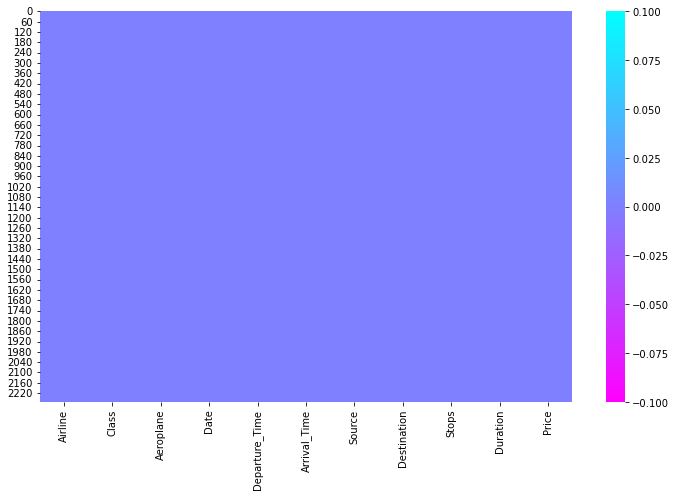

In [30]:
plt.figure(figsize=(10,7))
sns.heatmap(df.isnull(), cmap= 'cool_r')
plt.show()

- **Dataset doesnot contain duplicate data or any missing value.**

### **Data Preprocessing**

- **1.Conversion of Duration column hr & Minutes format to Minutes**

In [31]:
df['Duration'] = df['Duration'].map(lambda x : x.replace('05m','5m'))

In [32]:
# Conversion of Duration column from hr & Minutes format to Minutes
df['Duration'] = df['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

# convert this column into a numeric datatypes
df['Duration']= pd.to_numeric(df['Duration'])

- **2.Create new column for day & date**

In [33]:
df['Day']= df['Date'].map(lambda x :x[:3])

In [34]:
df['Date']= df['Date'].map(lambda x :x[4:])

In [35]:
df

,Airline,Class,Aeroplane,Date,Departure_Time,Arrival_Time,Source,Destination,Stops,Duration,Price,Day
0,SpiceJet,Economy,SG-2976/279,12 Jan 2023,20:10,10:30\n+ 1 day,New Delhi,Mumbai,1 Stop,860,5270,Thu
1,Air Asia,Economy,I5-743/762,12 Jan 2023,04:55,13:05,New Delhi,Mumbai,1 Stop,490,5383,Thu
2,Air Asia,Economy,I5-1228/613,12 Jan 2023,09:30,19:00,New Delhi,Mumbai,1 Stop,570,5383,Thu
3,Air Asia,Economy,I5-740/613,12 Jan 2023,08:10,19:00,New Delhi,Mumbai,1 Stop,650,5383,Thu
4,Air Asia,Economy,I5-1228/1782,12 Jan 2023,09:30,21:00,New Delhi,Mumbai,1 Stop,690,5383,Thu
5,IndiGo,Economy,6E-2117/265,12 Jan 2023,11:05,16:45,New Delhi,Mumbai,1 Stop,340,5592,Thu
6,IndiGo,Economy,6E-5218,12 Jan 2023,06:30,08:45,New Delhi,Mumbai,Non Stop,135,5794,Thu
7,IndiGo,Economy,6E-5318,12 Jan 2023,16:25,18:40,New Delhi,Mumbai,Non Stop,135,5794,Thu
8,SpiceJet,Economy,SG-8701,12 Jan 2023,06:45,09:00,New Delhi,Mumbai,Non Stop,135,5799,Thu
9,Go First,Economy,G8-530,12 Jan 2023,06:00,08:10,New Delhi,Mumbai,Non Stop,130,5899,Thu


In [36]:
Categorical = ['Airline','Class','Day','Stops','Aeroplane']

In [37]:
pd.set_option('display.max_rows',None)
for i in Categorical :
    print(i)
    print(df[i].value_counts())
    print('='*100)

Airline
Vistara Premium Economy    730
Vistara Business           419
Air India Business         339
IndiGo                     225
Air India                  201
Vistara                    195
Go First                    94
Air Asia                    48
SpiceJet                    20
Name: Airline, dtype: int64
Class
Economy            783
Business           758
Premium Ecomony    730
Name: Class, dtype: int64
Day
Fri    430
Thu    427
Sat    423
Sun    359
Mon    356
Tue    141
Wed    135
Name: Day, dtype: int64
Stops
1 Stop       1635
Non Stop      635
2 Stop(s)       1
Name: Stops, dtype: int64
Aeroplane
UK-985          27
UK-943          27
UK-927          27
UK-963          26
UK-995          26
UK-951          26
UK-955          26
UK-981          26
UK-993          25
UK-957          25
UK-977          25
UK-933          25
UK-969/918      24
UK-975          23
UK-871/872      23
UK-627/626      22
UK-929/918      21
UK-979/918      21
UK-941          21
UK-929/936      21
UK-

In [38]:
df.describe(include=object).style.background_gradient(cmap='summer_r')

,Airline,Class,Aeroplane,Date,Departure_Time,Arrival_Time,Source,Destination,Stops,Day
count,2271,2271,2271,2271,2271,2271,2271,2271,2271,2271
unique,9,3,336,12,125,164,1,1,3,7
top,Vistara Premium Economy,Economy,UK-985,15 Jan 2023,20:40,06:15 + 1 day,New Delhi,Mumbai,1 Stop,Fri
freq,730,783,27,299,107,78,2271,2271,1635,430


# EDA 

#### **Exploring Airline Types**

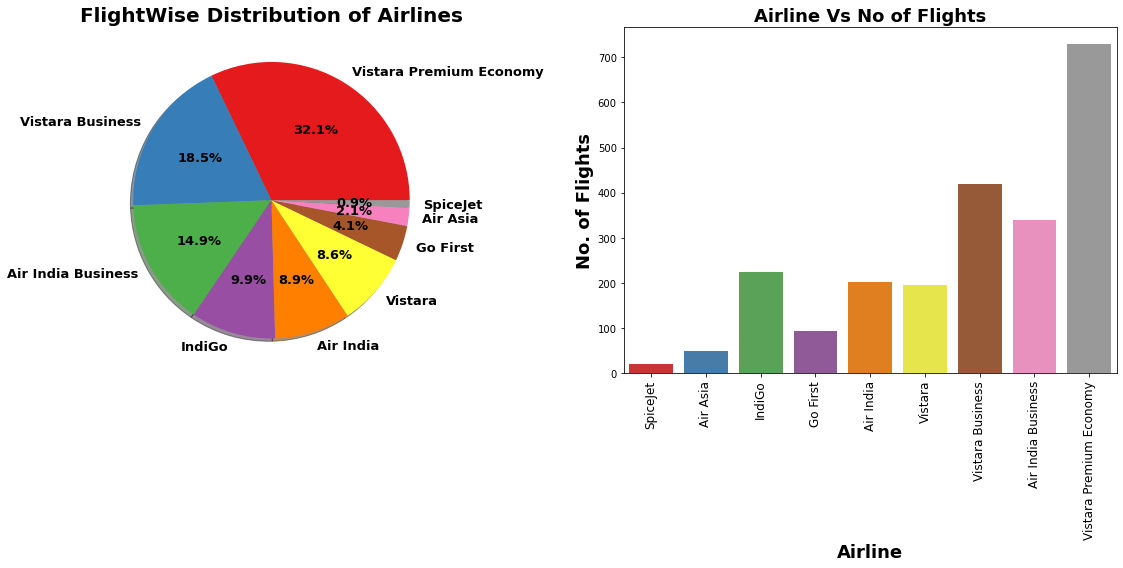

In [39]:
# Pie & count plot of Airline types
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set1')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Airline'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={ 'fontsize':13,'fontweight' :'bold'}, ax=ax[0],shadow=True)
ax[0].set_title('FlightWise Distribution of Airlines', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Airline',data=df,ax=ax[1])
ax[1].set_title('Airline Vs No of Flights',fontsize=18,fontweight ='bold')
ax[1].set_xlabel("Airline",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("No. of Flights",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=12,rotation= 90)
plt.tight_layout()
plt.show()

#### Observation:
- **We can see maximum number of flights run by Vistara Premium Economy while minimum Flights run by Spicejet.**

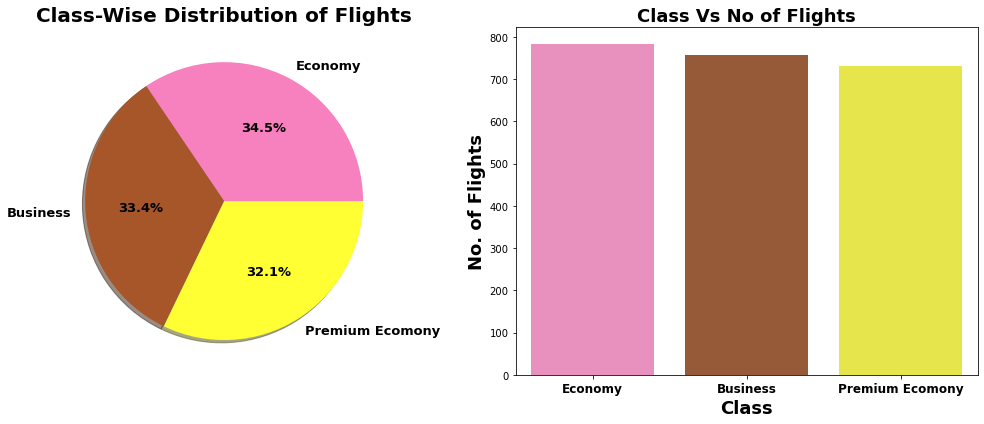

In [40]:
# Counting class type
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set1_r')
f,ax=plt.subplots(1,2,figsize=(14,6))
df['Class'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={ 'fontsize':13,'fontweight' :'bold'}, ax=ax[0],shadow=True)
ax[0].set_title('Class-Wise Distribution of Flights', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Class',data=df,ax=ax[1])
ax[1].set_title('Class Vs No of Flights',fontsize=18,fontweight ='bold')
ax[1].set_xlabel("Class",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("No. of Flights",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observation:
- To have a balanced dataset for price pediction all the three classes are being integrated into the dataset in equal proportions.

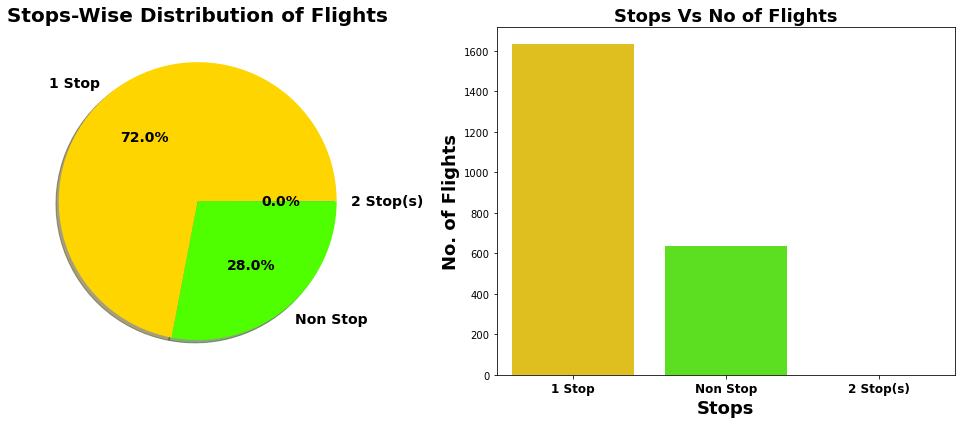

In [41]:
# Counting No of stops
plt.rcParams["figure.autolayout"] = True
sns.set_palette('hsv')
f,ax=plt.subplots(1,2,figsize=(14,6))
df['Stops'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={ 'fontsize':14,'fontweight' :'bold'}, ax=ax[0],shadow=True)
ax[0].set_title('Stops-Wise Distribution of Flights', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Stops',data=df,ax=ax[1])
ax[1].set_title('Stops Vs No of Flights',fontsize=18,fontweight ='bold')
ax[1].set_xlabel("Stops",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("No. of Flights",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observation:
- **72% flights take single stop in there way from New Dehli to Mumbai.It is also possible that these flights may have high flight duration compare to Non-stop Flight**
- **28% of flights do not have any stop in there route.**

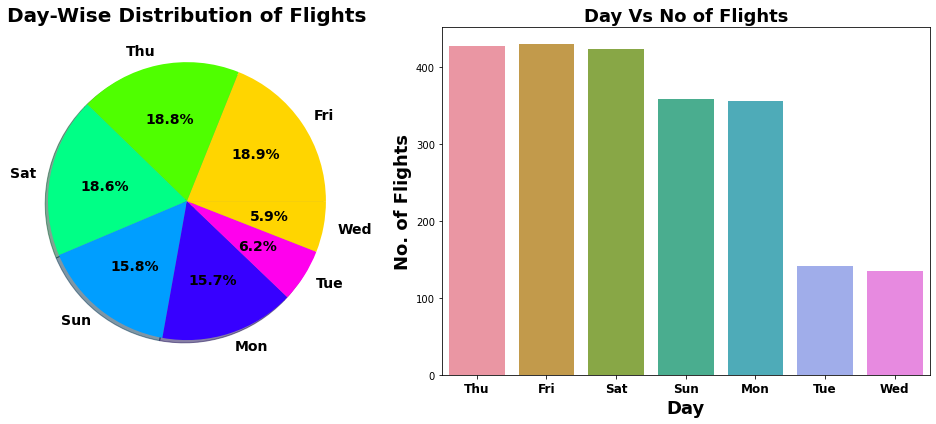

In [42]:
# Counting No of stops
plt.rcParams["figure.autolayout"] = True
sns.set_palette('hsv')
f,ax=plt.subplots(1,2,figsize=(14,6))
df['Day'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={ 'fontsize':14,'fontweight' :'bold'}, ax=ax[0],shadow=True)
ax[0].set_title('Day-Wise Distribution of Flights', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Day',data=df,ax=ax[1])
ax[1].set_title('Day Vs No of Flights',fontsize=18,fontweight ='bold')
ax[1].set_xlabel("Day",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("No. of Flights",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

- **On Friday Maximum flights run while on Wednesday minimum flights run**

**It will be interesting to investigate variation of fare as per different week days.**

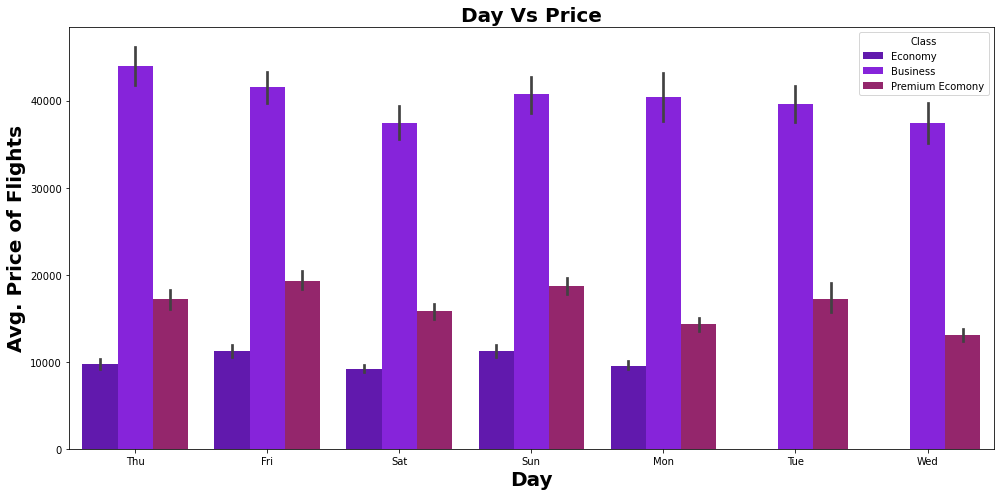

In [43]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('gnuplot')
plt.figure(figsize =(14,7))
sns.barplot(x=df['Day'],y=df['Price'],hue=df['Class'])
plt.title("Day Vs Price",fontsize=20,fontweight ='bold')
plt.xlabel('Day',fontsize = 20,fontweight ='bold')
plt.ylabel('Avg. Price of Flights',fontsize = 20,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observation:
- **Maximum Avg. Fare for Business Flights is on Thursday while minimum Avg. Fare for Business flights on Saturday.**
- **Maximum Avg. Fare for Ecomony Flights is on Sunday.**
- **Maximum Avg. Fare for Premium Ecomony Flights is on Friday while minimum Avg. Fare for Premium Ecomony Flights on Wednesday.**

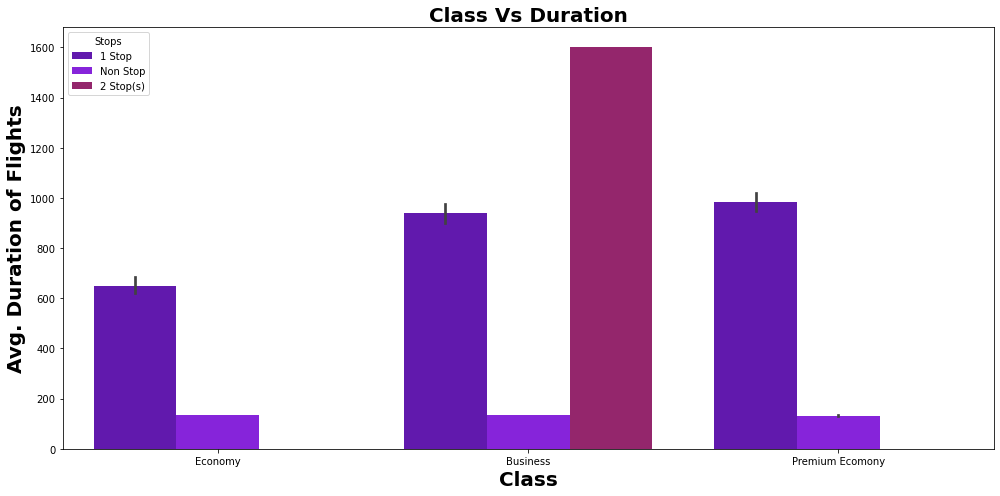

In [44]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('gnuplot')
plt.figure(figsize =(14,7))
sns.barplot(x=df['Class'],y=df['Duration'],hue=df['Stops'])
plt.title("Class Vs Duration",fontsize=20,fontweight ='bold')
plt.xlabel('Class',fontsize = 20,fontweight ='bold')
plt.ylabel('Avg. Duration of Flights',fontsize = 20,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observation:
- **As Number of Stops increase the duration of flights increases.**
- **As per Class of flight Maximum Avg. Duration of flight is for Business class.** 

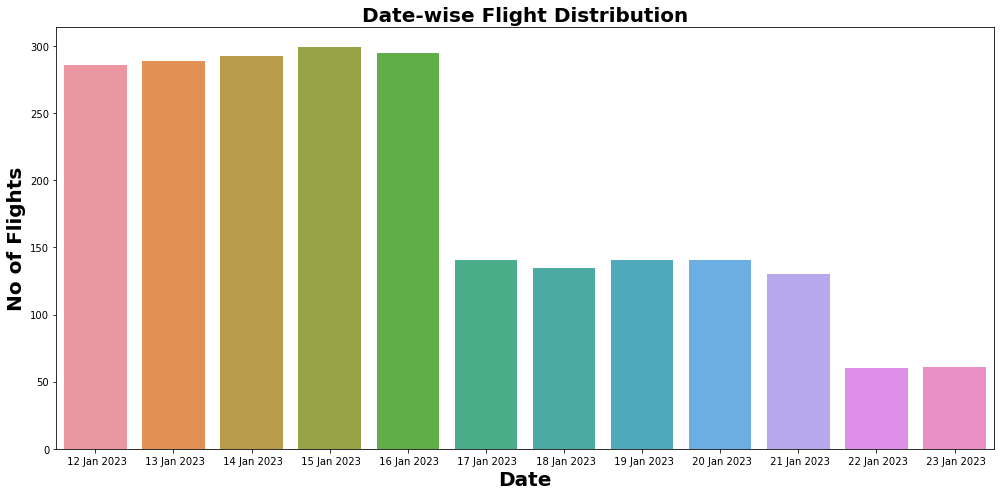

In [45]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('mako')
plt.figure(figsize =(14,7))
sns.countplot(x=df['Date'])
plt.title("Date-wise Flight Distribution",fontsize=20,fontweight ='bold')
plt.xlabel('Date',fontsize = 20,fontweight ='bold')
plt.ylabel('No of Flights',fontsize = 20,fontweight ='bold')
plt.tight_layout()
plt.show()

**We can see those Maximum flights schedule on 2 Feb 2022 & Minimum flights schedule on 24 Jan 2022.**

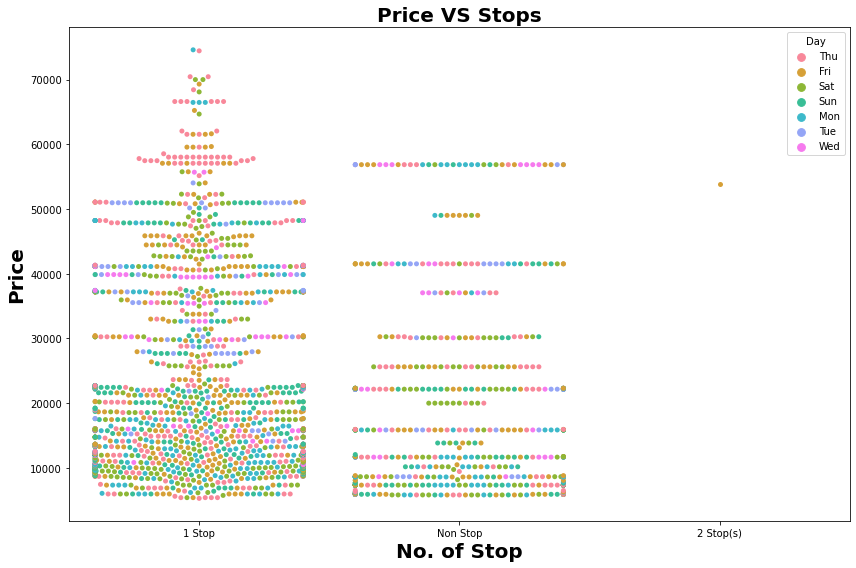

In [46]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('mako')
plt.figure(figsize =(12,8))
sns.swarmplot(y=df['Price'],x=df['Stops'], hue= df['Day'])
plt.title("Price VS Stops",fontsize=20,fontweight ='bold')
plt.xlabel('No. of Stop',fontsize = 20,fontweight ='bold')
plt.ylabel('Price',fontsize = 20,fontweight ='bold')
plt.tight_layout()
plt.show()

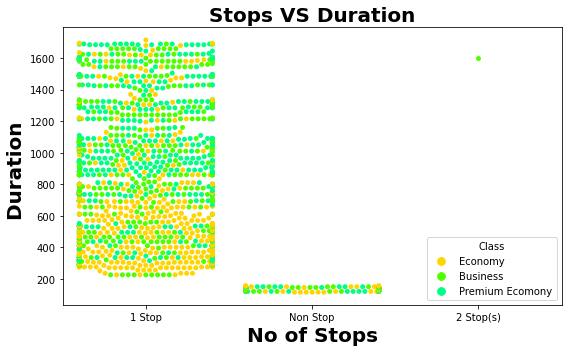

In [47]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('hsv')
plt.figure(figsize =(8,5))
sns.swarmplot(y=df['Duration'],x=df['Stops'], hue =df['Class'])
plt.title("Stops VS Duration",fontsize=20,fontweight ='bold')
plt.xlabel('No of Stops',fontsize = 20,fontweight ='bold')
plt.ylabel('Duration ',fontsize = 20,fontweight ='bold')
plt.tight_layout()
plt.show()

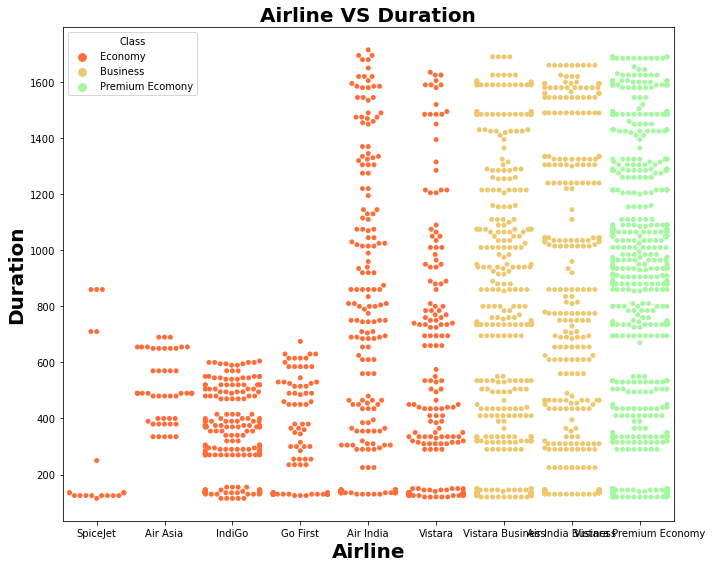

In [48]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow_r')
plt.figure(figsize =(10,8))
sns.swarmplot(x=df['Airline'],y=df['Duration'], hue =df['Class'])
plt.title("Airline VS Duration",fontsize=20,fontweight ='bold')
plt.xlabel('Airline',fontsize = 20,fontweight ='bold')
plt.ylabel('Duration',fontsize = 20,fontweight ='bold')
plt.tight_layout()
plt.show()

## ***Feature Engineering***

### **1. Encoding Categorical Data**

In [49]:
# Dropping Unnecessary columns
df.drop(columns=['Departure_Time','Arrival_Time','Source','Destination'], inplace= True)

In [50]:
# lets sort columns by their datatype
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Duration', 'Price'], object: ['Airline', 'Class', 'Aeroplane', 'Date', 'Stops', 'Day']}

In [51]:
Categorical = ['Airline', 'Class', 'Aeroplane', 'Date', 'Stops', 'Day']
Numerical = ['Duration', 'Price']

In [52]:
df['Aeroplane']= df['Aeroplane'].map(lambda x: str(x).replace('-',''))
df['Aeroplane']= df['Aeroplane'].map(lambda x: str(x).replace('/',''))

In [53]:
# Using Label encoder for transforming Categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Categorical:
    df[i] =le.fit_transform(df[i])
df.head()

,Airline,Class,Aeroplane,Date,Stops,Duration,Price,Day
0,5,1,192,0,0,860,5270,4
1,0,1,184,0,0,490,5383,4
2,0,1,181,0,0,570,5383,4
3,0,1,183,0,0,650,5383,4
4,0,1,180,0,0,690,5383,4


- **We have sucessfully converted Categorical variable in numerical variable using label encoder**

### **2. Outliers Detection & Removal**

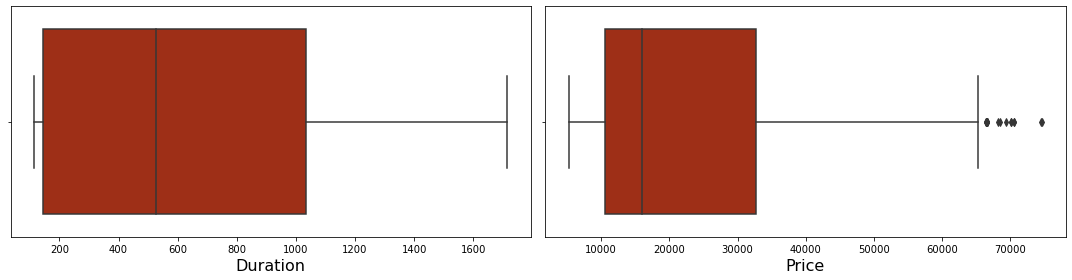

In [54]:
plt.figure(figsize=(15,4), facecolor ='white')
plt_num = 1
for i in Numerical:
    if plt_num <= 2:
        ax = plt.subplot(1,2,plt_num)
        sns.boxplot(df[i], palette='gnuplot')
        plt.xlabel(i, fontsize= 16)
    plt_num += 1
plt.show()

**From Boxplot we can see presense of outliers.**

**Since Data is realstic and data is error-free, we will Proceed for building ML model  without removing outliers. Since Outliers detected are with realstic value.**

### **3. Correlation**

In [55]:
df.corr()

,Airline,Class,Aeroplane,Date,Stops,Duration,Price,Day
Airline,1.000000,0.483523,0.758975,0.328839,0.012432,0.097298,0.055651,0.083684
Class,0.483523,1.000000,0.283102,0.126496,-0.043235,0.055717,-0.638375,-0.038640
Aeroplane,0.758975,0.283102,1.000000,0.280418,0.150172,0.003842,0.104204,0.072415
Date,0.328839,0.126496,0.280418,1.000000,-0.028363,0.102665,0.071301,0.026480
Stops,0.012432,-0.043235,0.150172,-0.028363,1.000000,-0.660810,-0.159455,-0.011952
Duration,0.097298,0.055717,0.003842,0.102665,-0.660810,1.000000,0.173383,0.041614
Price,0.055651,-0.638375,0.104204,0.071301,-0.159455,0.173383,1.000000,0.111726
Day,0.083684,-0.038640,0.072415,0.026480,-0.011952,0.041614,0.111726,1.000000


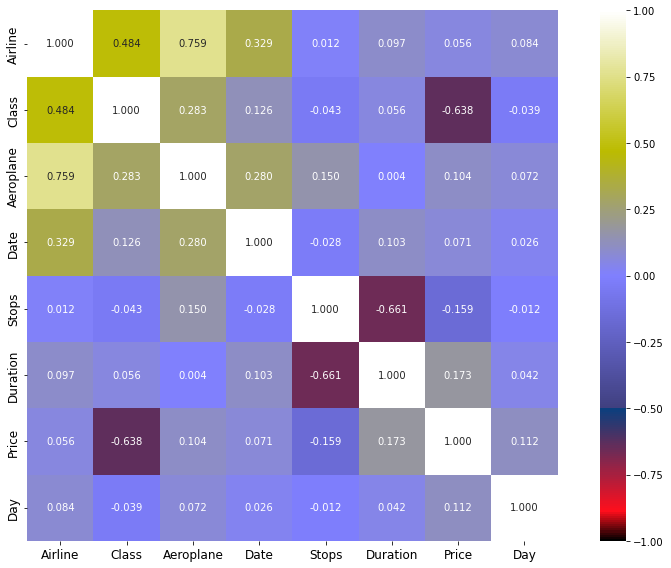

In [56]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),linecolor='black', vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap='gist_stern')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

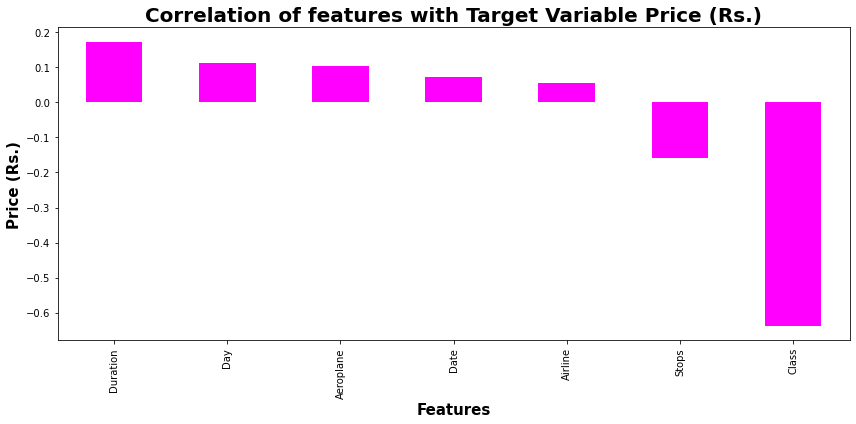

In [57]:
plt.figure(figsize = (12,6))
df.corr()['Price'].drop(['Price']).sort_values(ascending=False).plot(kind='bar',cmap = 'spring')
plt.xlabel('Features',fontsize=15,fontweight='bold')
plt.ylabel('Price (Rs.)',fontsize=15,fontweight='bold')
plt.title('Correlation of features with Target Variable Price (Rs.)',fontsize = 20,fontweight='bold')
plt.show()

#### Observation:

- **Most of features are moderately & poorly correlated with each other.**

### **4. Skewness detection**

In [58]:
df.skew()

Airline     -0.503791
Class        0.022464
Aeroplane   -0.409197
Date         0.571801
Stops        0.981531
Duration     0.582791
Price        1.003979
Day          0.248915
dtype: float64

- **We can see Price, Stops & Duration are skewed features.**
- **We cannot transform Price features as it is target variable while stops is categorical variable so concept of skewness doesnot applicable to it.**

## **Standard Scaling**

In [59]:
# Splitting data in target and dependent feature
X = df.drop(['Price'], axis=1)
Y = df['Price']

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)

### STEP_03: Machine Learning Model Building :-

In [61]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=99, test_size=0.33)
print('Training Feature Matrix Size:', X_train.shape)
print('Training Target Vector Size :', Y_train.shape)
print('Test Feature Matrix Size:', X_test.shape)
print('Test Target Vector Size:', Y_test.shape)

Training Feature Matrix Size: (1521, 7)
Training Target Vector Size : (1521,)
Test Feature Matrix Size: (750, 7)
Test Target Vector Size: (750,)


### **Finding best Random state**

In [63]:
maxR2_score=0
maxRS=0
for i in range(50,500):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=i, test_size=.33)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.6660283465684131 on Random_state 111


### **Linear Regression**

In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state= 70, test_size=0.33)
lin_reg= LinearRegression()
lin_reg.fit(X_train, Y_train)
y_pred = lin_reg.predict(X_test)
print('\033[1m'+ 'Error :'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred)*100)

Error :
Mean absolute error : 6926.525438402277
Mean squared error : 81737772.95136161
Root Mean squared error : 9040.894477393353
 R2 Score :
62.21866081364096


In [65]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, X_scale, Y, cv=5)
print('\033[1m'+'Cross Validation Score :',lin_reg,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())

Cross Validation Score : LinearRegression() :

Mean CV Score : -2.538892855398599


### **Random Forest Regressor**

In [66]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state= 70, test_size=0.33)
rfc = RandomForestRegressor()
rfc.fit(X_train, Y_train)
y_pred = rfc.predict(X_test)
print('\033[1m'+ 'Error of Random Forest Regressor:'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('\033[1m'+'R2 Score of Random Forest Regressor :'+'\033[0m')
print(r2_score(Y_test,y_pred)*100)

Error of Random Forest Regressor:
Mean absolute error : 2881.78448
Mean squared error : 18859615.945131734
Root Mean squared error : 4342.765932574738
R2 Score of Random Forest Regressor :
91.28259161928123


In [67]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(rfc, X_scale, Y, cv=5)
print('\033[1m'+'Cross Validation Score :',rfc,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())

Cross Validation Score : RandomForestRegressor() :

Mean CV Score : 0.2791810668130482


### **Decision Tree Regressor**

In [68]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state= 70, test_size=0.33)
dtc = DecisionTreeRegressor()
dtc.fit(X_train, Y_train)
y_pred = dtc.predict(X_test)
print('\033[1m'+ 'Error of Decision Tree Regressor:'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('\033[1m'+'R2 Score of Decision Tree Regressor :'+'\033[0m')
print(r2_score(Y_test,y_pred)*100)

Error of Decision Tree Regressor:
Mean absolute error : 3441.0253333333335
Mean squared error : 33560112.017333336
Root Mean squared error : 5793.1090113455775
R2 Score of Decision Tree Regressor :
84.48763736181593


In [69]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(dtc, X_scale, Y, cv=5)
print('\033[1m'+'Cross Validation Score :',dtc,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())

Cross Validation Score : DecisionTreeRegressor() :

Mean CV Score : -0.009010510274995841


### **Extra Trees Regressor**

In [70]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state= 70, test_size=0.33)
etc = ExtraTreesRegressor()
dtc.fit(X_train, Y_train)
y_pred = dtc.predict(X_test)
print('\033[1m'+ 'Error of Extra Tree Regressor:'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('\033[1m'+'R2 Score of Extra Tree Regressor :'+'\033[0m')
print(r2_score(Y_test,y_pred)*100)

Error of Extra Tree Regressor:
Mean absolute error : 3398.848
Mean squared error : 33945659.816
Root Mean squared error : 5826.290399216297
R2 Score of Extra Tree Regressor :
84.3094270726434


In [71]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(etc, X_scale, Y, cv=5)
print('\033[1m'+'Cross Validation Score :',etc,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())

Cross Validation Score : ExtraTreesRegressor() :

Mean CV Score : 0.07807245486557306


### **XGB Regressor**

In [72]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state= 70, test_size=0.33)
xgb = XGBRegressor()
xgb.fit(X_train, Y_train)
y_pred = xgb.predict(X_test)
print('\033[1m'+ 'Error of XGB Regressor:'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('\033[1m'+'R2 Score of XGB Regressor :'+'\033[0m')
print(r2_score(Y_test,y_pred)*100)

Error of XGB Regressor:
Mean absolute error : 2971.5372174479166
Mean squared error : 18562267.77679951
Root Mean squared error : 4308.395034905633
R2 Score of XGB Regressor :
91.42003372956343


In [73]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(xgb, X_scale, Y, cv=5)
print('\033[1m'+'Cross Validation Score :',xgb,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())

Cross Validation Score : XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...) :

Mean CV Score : 0.19036873474212035


- **We can see that XGB Regressor gives maximum R2 score of 99.013 and maximum cross validation score. Among all model we will select XGB Regressor as final model and we will perform hyper parameter tuning over this model to enhance its R2 Score.**

# Hyper Parameter Tuning : GridSearchCV

In [74]:
from sklearn.model_selection import GridSearchCV

In [75]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=70, test_size=0.33)

In [76]:
parameter = {'n_estimators':[400,500],'gamma':np.arange(0,0.2,0.1),
              'booster' : ['gbtree','dart','gblinear'], 'max_depth':[6,8],
              'eta' : [0.01, 0.1] }

In [77]:
GCV = GridSearchCV(XGBRegressor(),parameter,verbose =10)

In [78]:
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5; 1/48] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=6, n_estimators=400
[CV 1/5; 1/48] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=6, n_estimators=400;, score=0.908 total time=   0.4s
[CV 2/5; 1/48] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=6, n_estimators=400
[CV 2/5; 1/48] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=6, n_estimators=400;, score=0.898 total time=   0.3s
[CV 3/5; 1/48] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=6, n_estimators=400
[CV 3/5; 1/48] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=6, n_estimators=400;, score=0.878 total time=   0.3s
[CV 4/5; 1/48] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=6, n_estimators=400
[CV 4/5; 1/48] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=6, n_estimators=400;, score=0.861 total time=   0.3s
[CV 5/5; 1/48] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=6, n_estimators=400
[CV 5/5; 1/48] END boo

[CV 5/5; 8/48] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=8, n_estimators=500;, score=0.885 total time=   0.6s
[CV 1/5; 9/48] START booster=gbtree, eta=0.1, gamma=0.0, max_depth=6, n_estimators=400
[CV 1/5; 9/48] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=6, n_estimators=400;, score=0.908 total time=   0.3s
[CV 2/5; 9/48] START booster=gbtree, eta=0.1, gamma=0.0, max_depth=6, n_estimators=400
[CV 2/5; 9/48] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=6, n_estimators=400;, score=0.887 total time=   0.3s
[CV 3/5; 9/48] START booster=gbtree, eta=0.1, gamma=0.0, max_depth=6, n_estimators=400
[CV 3/5; 9/48] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=6, n_estimators=400;, score=0.896 total time=   0.3s
[CV 4/5; 9/48] START booster=gbtree, eta=0.1, gamma=0.0, max_depth=6, n_estimators=400
[CV 4/5; 9/48] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=6, n_estimators=400;, score=0.860 total time=   0.3s
[CV 5/5; 9/48] START booster=gbtree, eta=0.1, gamma=0.0, max_

[CV 5/5; 16/48] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=8, n_estimators=500;, score=0.881 total time=   0.5s
[CV 1/5; 17/48] START booster=dart, eta=0.01, gamma=0.0, max_depth=6, n_estimators=400
[CV 1/5; 17/48] END booster=dart, eta=0.01, gamma=0.0, max_depth=6, n_estimators=400;, score=0.908 total time=   7.6s
[CV 2/5; 17/48] START booster=dart, eta=0.01, gamma=0.0, max_depth=6, n_estimators=400
[CV 2/5; 17/48] END booster=dart, eta=0.01, gamma=0.0, max_depth=6, n_estimators=400;, score=0.898 total time=   7.6s
[CV 3/5; 17/48] START booster=dart, eta=0.01, gamma=0.0, max_depth=6, n_estimators=400
[CV 3/5; 17/48] END booster=dart, eta=0.01, gamma=0.0, max_depth=6, n_estimators=400;, score=0.878 total time=   7.8s
[CV 4/5; 17/48] START booster=dart, eta=0.01, gamma=0.0, max_depth=6, n_estimators=400
[CV 4/5; 17/48] END booster=dart, eta=0.01, gamma=0.0, max_depth=6, n_estimators=400;, score=0.861 total time=   7.8s
[CV 5/5; 17/48] START booster=dart, eta=0.01, gamma=0.0, max_

[CV 5/5; 24/48] END booster=dart, eta=0.01, gamma=0.1, max_depth=8, n_estimators=500;, score=0.885 total time=  12.9s
[CV 1/5; 25/48] START booster=dart, eta=0.1, gamma=0.0, max_depth=6, n_estimators=400
[CV 1/5; 25/48] END booster=dart, eta=0.1, gamma=0.0, max_depth=6, n_estimators=400;, score=0.908 total time=   7.9s
[CV 2/5; 25/48] START booster=dart, eta=0.1, gamma=0.0, max_depth=6, n_estimators=400
[CV 2/5; 25/48] END booster=dart, eta=0.1, gamma=0.0, max_depth=6, n_estimators=400;, score=0.887 total time=   7.7s
[CV 3/5; 25/48] START booster=dart, eta=0.1, gamma=0.0, max_depth=6, n_estimators=400
[CV 3/5; 25/48] END booster=dart, eta=0.1, gamma=0.0, max_depth=6, n_estimators=400;, score=0.896 total time=   7.7s
[CV 4/5; 25/48] START booster=dart, eta=0.1, gamma=0.0, max_depth=6, n_estimators=400
[CV 4/5; 25/48] END booster=dart, eta=0.1, gamma=0.0, max_depth=6, n_estimators=400;, score=0.860 total time=   7.4s
[CV 5/5; 25/48] START booster=dart, eta=0.1, gamma=0.0, max_depth=6, n

[CV 4/5; 33/48] START booster=gblinear, eta=0.01, gamma=0.0, max_depth=6, n_estimators=400
[19:28:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 4/5; 33/48] END booster=gblinear, eta=0.01, gamma=0.0, max_depth=6, n_estimators=400;, score=0.619 total time=   0.0s
[CV 5/5; 33/48] START booster=gblinear, eta=0.01, gamma=0.0, max_depth=6, n_estimators=400
[19:28:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 5/5; 33/48] END booster=gblinear, eta=0.01, gamma=0.0, max_depth=6, n_estimators=400;, score=0.614 total time=   0.0s
[CV 1/5; 34/48] START booster=gblinear, eta=0.01, gamma=0.0, max_depth=6, n_estimators=500
[19:28:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu

[CV 4/5; 37/48] END booster=gblinear, eta=0.01, gamma=0.1, max_depth=6, n_estimators=400;, score=0.619 total time=   0.0s
[CV 5/5; 37/48] START booster=gblinear, eta=0.01, gamma=0.1, max_depth=6, n_estimators=400
[19:28:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 5/5; 37/48] END booster=gblinear, eta=0.01, gamma=0.1, max_depth=6, n_estimators=400;, score=0.614 total time=   0.0s
[CV 1/5; 38/48] START booster=gblinear, eta=0.01, gamma=0.1, max_depth=6, n_estimators=500
[19:28:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 1/5; 38/48] END booster=gblinear, eta=0.01, gamma=0.1, max_depth=6, n_estimators=500;, score=0.637 total time=   0.0s
[CV 2/5; 38/48] START booster=gbline

[CV 1/5; 42/48] START booster=gblinear, eta=0.1, gamma=0.0, max_depth=6, n_estimators=500
[19:28:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 1/5; 42/48] END booster=gblinear, eta=0.1, gamma=0.0, max_depth=6, n_estimators=500;, score=0.637 total time=   0.0s
[CV 2/5; 42/48] START booster=gblinear, eta=0.1, gamma=0.0, max_depth=6, n_estimators=500
[19:28:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 2/5; 42/48] END booster=gblinear, eta=0.1, gamma=0.0, max_depth=6, n_estimators=500;, score=0.617 total time=   0.0s
[CV 3/5; 42/48] START booster=gblinear, eta=0.1, gamma=0.0, max_depth=6, n_estimators=500
[19:28:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-auto

[CV 2/5; 46/48] START booster=gblinear, eta=0.1, gamma=0.1, max_depth=6, n_estimators=500
[19:28:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 2/5; 46/48] END booster=gblinear, eta=0.1, gamma=0.1, max_depth=6, n_estimators=500;, score=0.617 total time=   0.0s
[CV 3/5; 46/48] START booster=gblinear, eta=0.1, gamma=0.1, max_depth=6, n_estimators=500
[19:28:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 3/5; 46/48] END booster=gblinear, eta=0.1, gamma=0.1, max_depth=6, n_estimators=500;, score=0.602 total time=   0.0s
[CV 4/5; 46/48] START booster=gblinear, eta=0.1, gamma=0.1, max_depth=6, n_estimators=500
[19:28:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-auto

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bi...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'booster': ['gbtree', 'dart', 'gblinear'],
                         'eta': [0.01, 0.1], 'gamma': array([0. , 0.1]),
                         'max_depth': [6, 8], 'n_estimators': [400, 500]},
             verbose=10)

In [79]:
GCV.best_params_

{'booster': 'gbtree',
 'eta': 0.01,
 'gamma': 0.0,
 'max_depth': 6,
 'n_estimators': 500}

## **Final Model**

In [80]:
Final_mod=XGBRegressor(booster='gbtree', max_depth=6, eta=0.01,
                                gamma=0.0, n_estimators=500)
Final_mod.fit(X_train,Y_train)
pred=Final_mod.predict(X_test)
print('R2_Score:',r2_score(Y_test,pred)*100)
print('mean_squared_error:',mean_squared_error(Y_test,pred))
print('mean_absolute_error:',mean_absolute_error(Y_test,pred))
print("RMSE value:",np.sqrt(mean_squared_error(Y_test, pred)))

R2_Score: 91.04201895960865
mean_squared_error: 19380081.176330384
mean_absolute_error: 3033.594888671875
RMSE value: 4402.281360423296


## **Saving Model**

In [81]:
# Saving the model using .pkl
import joblib
joblib.dump(Final_mod,"Flight_Price_Prediction.pkl")

['Flight_Price_Prediction.pkl']

## **Predictions Using Final Model**

In [82]:
# Loading the saved model
model = joblib.load("Flight_Price_Prediction.pkl")

# Prediction
prediction = model.predict(X_test)
prediction

array([11572.494 ,  9148.541 , 45410.152 , 10452.038 , 11920.74  ,
       16898.912 , 11605.881 , 37423.93  , 56913.824 , 15898.524 ,
       15881.198 , 18519.477 , 12453.257 , 47617.33  , 11172.644 ,
       37947.805 , 30733.26  , 51414.02  ,  9692.28  , 47602.832 ,
       53913.445 , 11646.998 , 40888.086 , 25087.527 , 14994.543 ,
        6484.7817, 12559.403 , 15265.544 , 13246.423 ,  6778.8896,
       42503.67  , 51087.605 , 51530.395 ,  9624.344 , 16421.416 ,
       35199.68  , 52030.76  ,  7119.151 , 12063.735 , 16940.936 ,
       28888.037 , 10731.951 , 15684.355 , 38402.652 ,  9955.71  ,
       19326.902 , 21014.643 , 11956.727 , 16101.761 , 21762.701 ,
        6584.5435, 10813.765 ,  7906.573 , 44965.99  , 12343.367 ,
        7056.062 , 22523.822 , 44123.582 , 42246.234 , 15052.237 ,
       52379.004 ,  6741.668 , 17427.445 , 17031.764 , 31250.096 ,
       19707.178 , 20914.1   , 40552.53  , 57451.03  , 43276.16  ,
       19492.762 , 55897.566 , 14002.828 , 10919.942 , 20897.1

In [83]:
pd.DataFrame([model.predict(X_test)[:], Y_test[:]], index = ['Predicted', 'Actual'])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749
Predicted,11572.494141,9148.541016,45410.152344,10452.038086,11920.740234,16898.912109,11605.880859,37423.929688,56913.824219,15898.524414,15881.198242,18519.476562,12453.256836,47617.328125,11172.643555,37947.804688,30733.259766,51414.019531,9692.280273,47602.832031,53913.445312,11646.998047,40888.085938,25087.527344,14994.542969,6484.781738,12559.40332,15265.543945,13246.422852,6778.889648,42503.671875,51087.605469,51530.394531,9624.34375,16421.416016,35199.679688,52030.761719,7119.150879,12063.735352,16940.935547,28888.037109,10731.951172,15684.355469,38402.652344,9955.709961,19326.902344,21014.642578,11956.726562,16101.760742,21762.701172,6584.543457,10813.764648,7906.573242,44965.988281,12343.367188,7056.062012,22523.822266,44123.582031,42246.234375,15052.237305,52379.003906,6741.667969,17427.445312,17031.763672,31250.095703,19707.177734,20914.099609,40552.53125,57451.03125,43276.160156,19492.761719,55897.566406,14002.828125,10919.942383,20897.175781,14987.342773,7582.620605,11330.015625,14465.541016,13654.711914,21381.869141,13784.651367,22608.257812,7011.225098,28900.283203,6389.271484